# Random Forest Algorithm

This notebook uses the sklearn library for the Random Forest Classifier Algorithm. It runs the algorithm using 20 random forests. It then returns a confusion matrix and the accuracy and a bar graph showing the features ranked by their importance.

The first block of code imports the libraries needed and contains methods used throughout the program.

The second block of code uses the cat data sets. There are four files. Three are the shelter files for Austin, Louisville, and Sonoma County. The fourth file is a combination of all three files. There are four classes, adoption, euthanasia, return to owner, and transfer. 

The third block of code uses the dog data sets. The set up is the same as the cat data. 

The fourth block runs files where the return to owner and transfer data points have been removed from the cat data. 

The fifth block runs files where the return to owner and transfer data points have been removed from the dog data.

After reviewing the accuracy results, it became clear that the data from Louisville was providing lower accuracy results than the rest of the cities. The sixth block is the results of the combined results without Louisville data.

Lastly, the seventh block of code tests the accuracy of the Random Forest algorithm when different numbers of forests are used. This shows that the selection of 20 random forests is a good representation for the data sets. 

In [2]:
#first import libraries needed
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

def visuals(testLabels, y_pred):
    print('----------------------------')
    #print(confusion_matrix(testLabels, y_pred))
    confMat = confusion_matrix(testLabels, y_pred)
    #print(confMat)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(confMat, classes=['adoption','euthanize','return to owner', 'transfer'],
                          title='Confusion matrix, without normalization')
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(confMat, classes=['adoption','euthanize','return to owner', 'transfer'], normalize=True,
                          title='Normalized Confusion Matrix')

    plt.show()
    #print(classification_report(testLabels, y_pred))
    accuracy = accuracy_score(testLabels, y_pred)
    print('Accuracy is: ', accuracy)  
    print()
    col=train.drop(['outcome'], axis=1)
    feature_imp = pd.Series(classifier.feature_importances_,index=list(col)).sort_values(ascending=False)
    # Creating a bar plot
    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    #plt.legend()
    plt.show()
    print()
    col=train.drop(['outcome'], axis=1)
    print('----------------------------')
    
def visuals2(testLabels, y_pred):
    print('----------------------------')
    #print(confusion_matrix(testLabels, y_pred))
    confMat = confusion_matrix(testLabels, y_pred)
    #print(confMat)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(confMat, classes=['adoption','euthanize'],
                          title='Confusion matrix, without normalization')
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(confMat, classes=['adoption','euthanize'], normalize=True,
                          title='Normalized Confusion Matrix')

    plt.show()
    #print(classification_report(testLabels, y_pred))
    accuracy = accuracy_score(testLabels, y_pred)
    print('Accuracy is: ', accuracy)  
    print()
    col=train.drop(['outcome'], axis=1)
    feature_imp = pd.Series(classifier.feature_importances_,index=list(col)).sort_values(ascending=False)
    # Creating a bar plot
    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    #plt.legend()
    plt.show()
    print()
    col=train.drop(['outcome'], axis=1)
    print('----------------------------')

Combo Cats Results
----------------------------


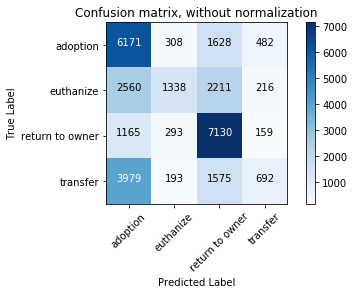

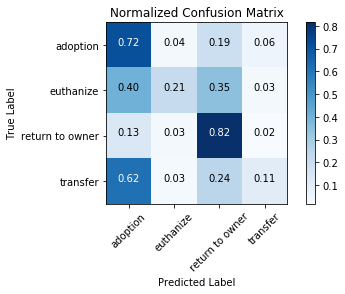

Accuracy is:  0.5093355481727575



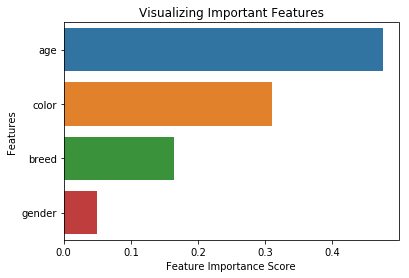


----------------------------
Sonoma County Cat Results
----------------------------


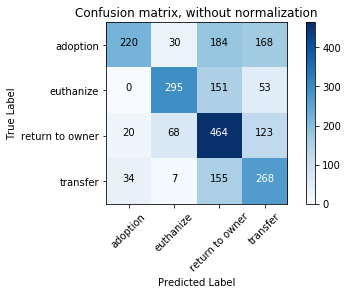

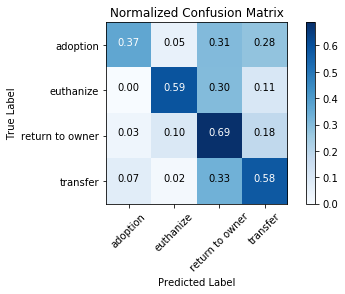

Accuracy is:  0.5566964285714285



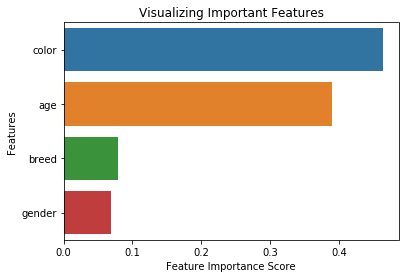


----------------------------
Austin Cat Results
----------------------------


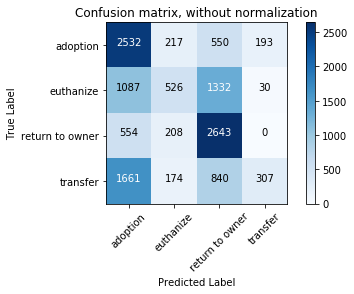

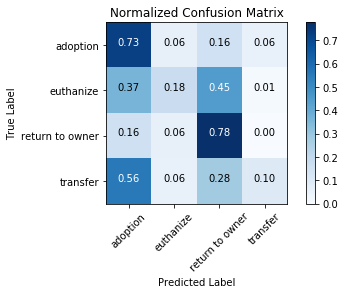

Accuracy is:  0.4674031429905088



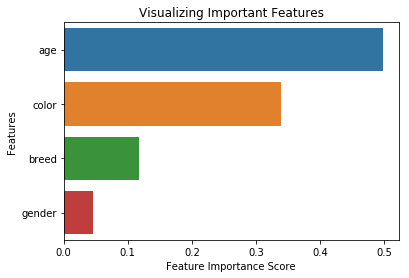


----------------------------
Louisville Cat Results
----------------------------


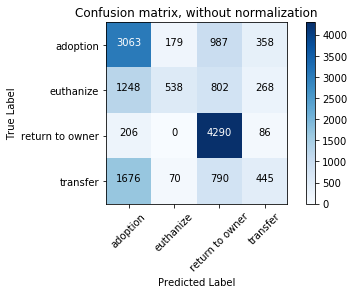

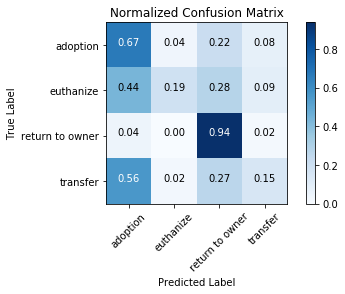

Accuracy is:  0.5555111288817807



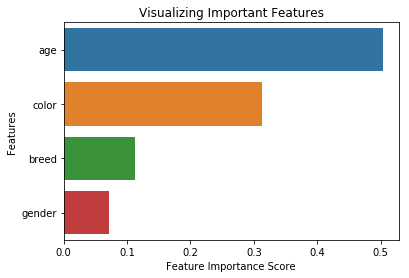


----------------------------


In [5]:
#read data from combined cats file
raw = pd.read_csv('combocatsint.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Combo Cats Results')
visuals(testLabels, y_pred)

#use this to print the test labels, predictions, and the features to see which animals were correctly and incorrectly predicted
#for i in range(len(testLabels)):
 #   print(i, testLabels[i], y_pred[i], testFeatures[i])
#print(len(testLabels))
#print(feature_imp)
#------------------------------------------------------------------------------------------
#read data for sonoma county cats
raw = pd.read_csv('sococatsbi.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Sonoma County Cat Results')
visuals(testLabels, y_pred)
#------------------------------------------------------------------------------------------
#read data for austin cats
raw = pd.read_csv('austincatsbi.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values


classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Austin Cat Results')
visuals(testLabels, y_pred)
#------------------------------------------------------------------------------------------
#read data for louisville cats
raw = pd.read_csv('louisvillecatsbi.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values


classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Louisville Cat Results')
visuals(testLabels, y_pred)

Combo Dogs Results
----------------------------


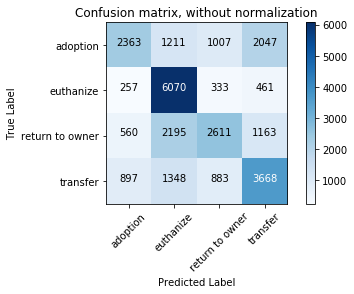

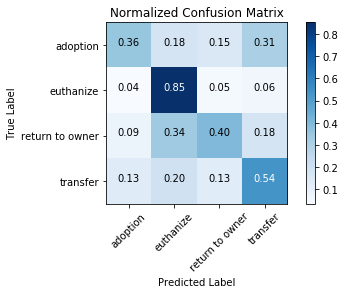

Accuracy is:  0.5433995715446553



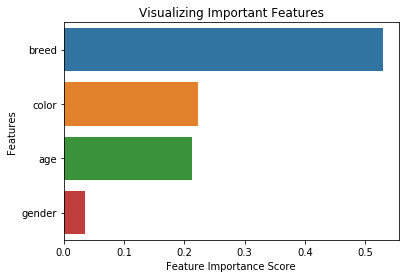


----------------------------
Sonoma County Dog Results
----------------------------


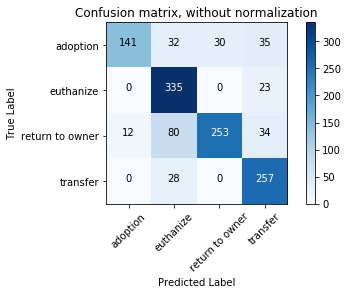

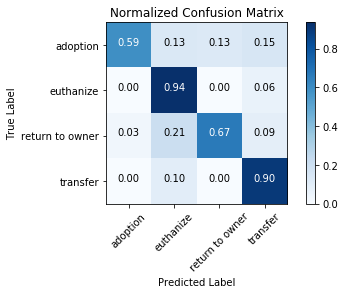

Accuracy is:  0.7825396825396825



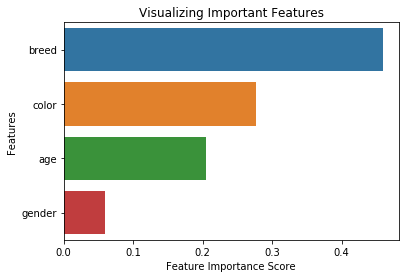


----------------------------
Austin Dog Results
----------------------------


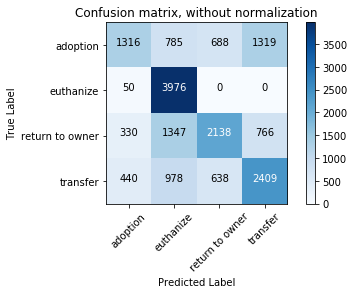

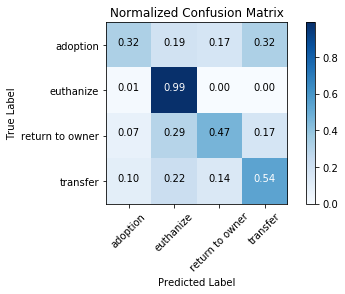

Accuracy is:  0.5727008149010477



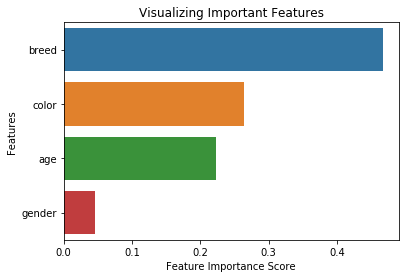


----------------------------
Louisville Dog Results
----------------------------


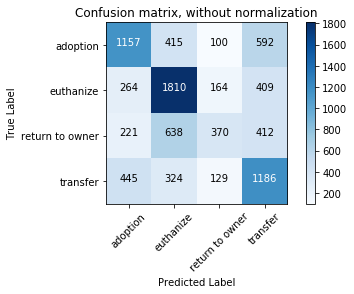

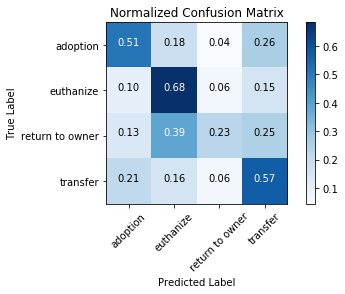

Accuracy is:  0.5237378415933303



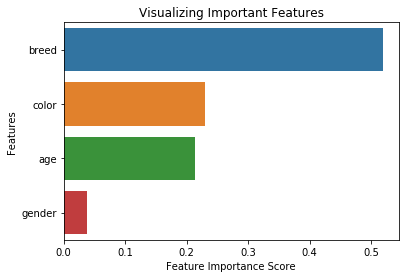


----------------------------


In [6]:
#read data from combined dogs file
raw = pd.read_csv('combodogsint.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Combo Dogs Results')
visuals(testLabels, y_pred)
#------------------------------------------------------------------------------------------
#read data for sonoma county dogs 
raw = pd.read_csv('socodogsbi.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values


classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Sonoma County Dog Results')
visuals(testLabels, y_pred)
#------------------------------------------------------------------------------------------
#read data for austin dogs
raw = pd.read_csv('austindogsbi.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Austin Dog Results')
visuals(testLabels, y_pred)
#------------------------------------------------------------------------------------------
#read data for louisville dogs
raw = pd.read_csv('louisvilledogsbi.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Louisville Dog Results')
visuals(testLabels, y_pred)

Combo Cats Results
----------------------------


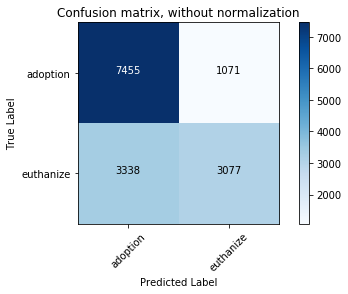

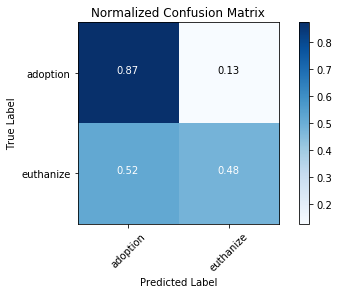

Accuracy is:  0.7049059634562613



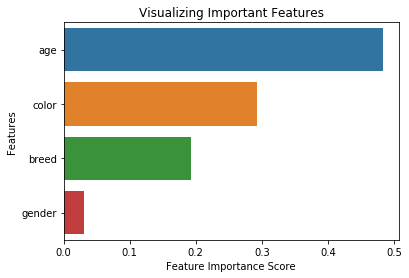


----------------------------
Sonoma County Cat Results
----------------------------


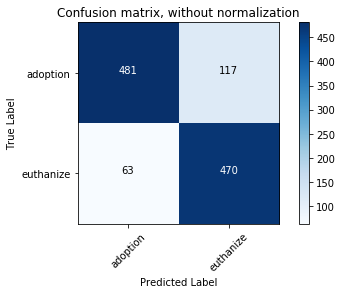

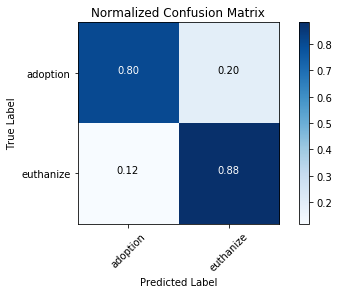

Accuracy is:  0.8408488063660478



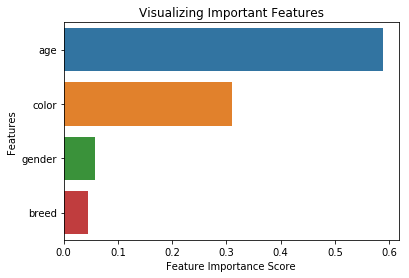


----------------------------
Austin Cat Results
----------------------------


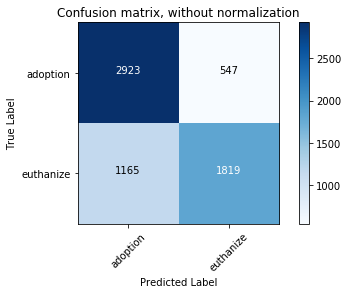

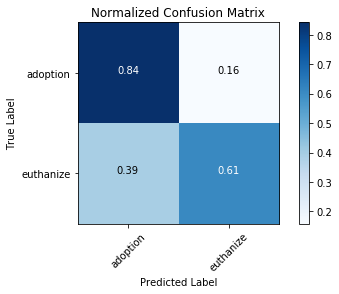

Accuracy is:  0.7347381468856523



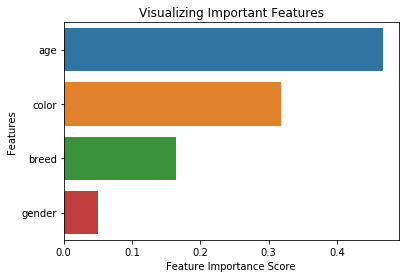


----------------------------
Louisville Cat Results
----------------------------


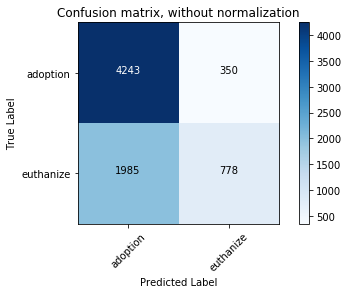

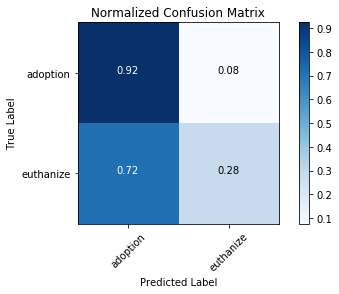

Accuracy is:  0.6825720500271887



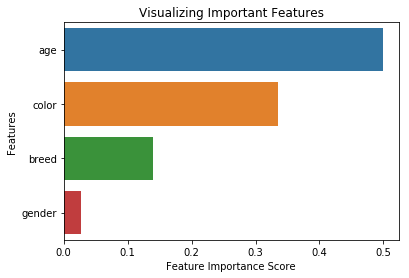


----------------------------


In [4]:
#read data from combined cats file
raw = pd.read_csv('combocatsintae.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Combo Cats Results')
visuals2(testLabels, y_pred)

#print(feature_imp)
#------------------------------------------------------------------------------------------
#read data for sonoma county cats
raw = pd.read_csv('sococatsbiae.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Sonoma County Cat Results')
visuals2(testLabels, y_pred)
#------------------------------------------------------------------------------------------
#read data for austin cats
raw = pd.read_csv('austincatsbiae.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values


classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Austin Cat Results')
visuals2(testLabels, y_pred)
#------------------------------------------------------------------------------------------
#read data for louisville cats
raw = pd.read_csv('louisvillecatsbiae.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values


classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Louisville Cat Results')
visuals2(testLabels, y_pred)

Combo Dogs Results
----------------------------


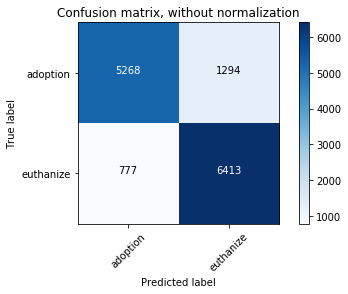

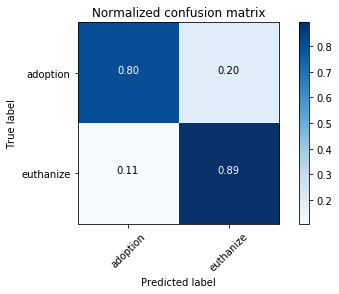

Accuracy is:  0.8494037230948226



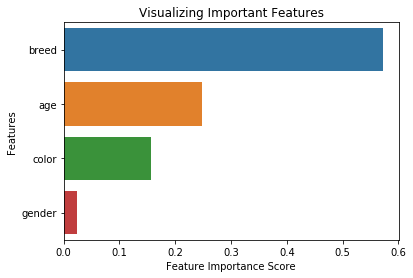


----------------------------
Sonoma County Dog Results
----------------------------


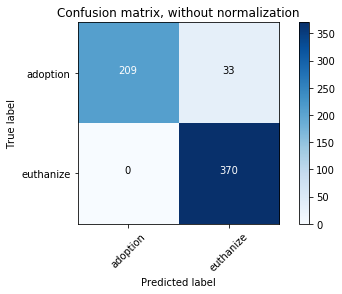

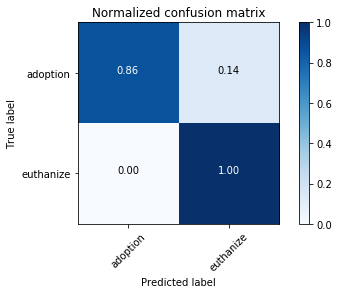

Accuracy is:  0.946078431372549



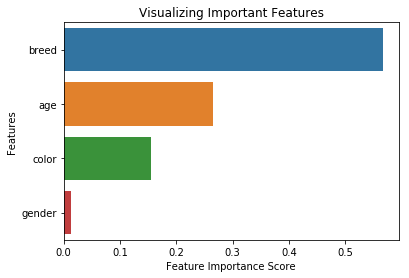


----------------------------
Austin Dog Results
----------------------------


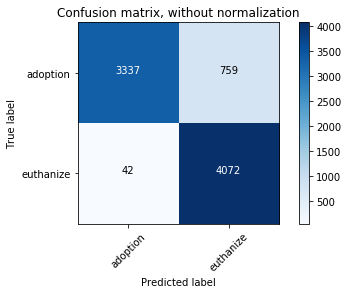

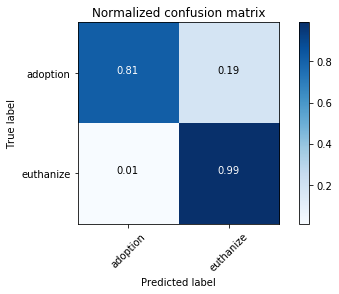

Accuracy is:  0.902436053593179



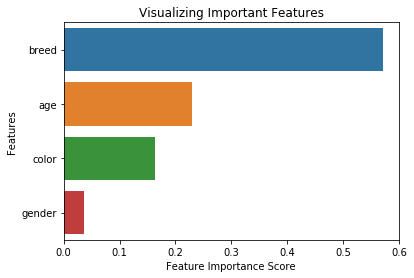


----------------------------
Louisville Dog Results
----------------------------


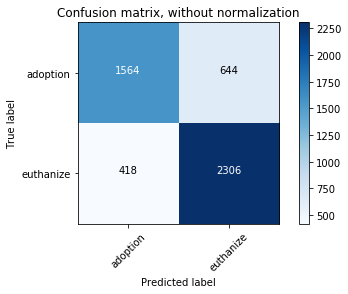

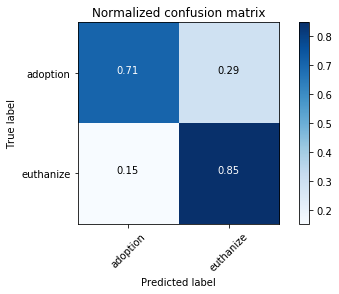

Accuracy is:  0.7846715328467153



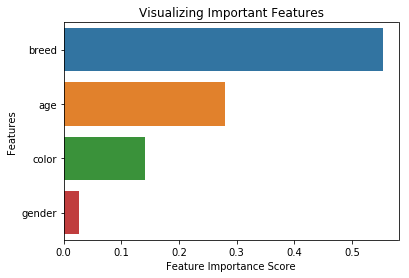


----------------------------


In [17]:
#read data from combined dogs file
raw = pd.read_csv('combodogsintae.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Combo Dogs Results')
visuals2(testLabels, y_pred)

#print(feature_imp)
#------------------------------------------------------------------------------------------
#read data for sonoma county cats
raw = pd.read_csv('socodogsbiae.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Sonoma County Dog Results')
visuals2(testLabels, y_pred)
#------------------------------------------------------------------------------------------
#read data for austin cats
raw = pd.read_csv('austindogsbiae.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values


classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Austin Dog Results')
visuals2(testLabels, y_pred)
#------------------------------------------------------------------------------------------
#read data for louisville cats
raw = pd.read_csv('louisvilledogsbiae.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values


classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Louisville Dog Results')

visuals2(testLabels, y_pred)

Combo Cats Results without Louisville
----------------------------


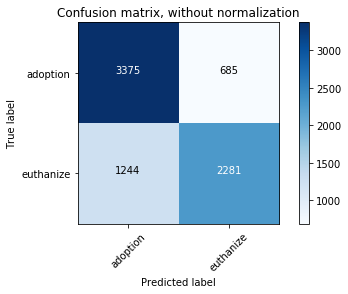

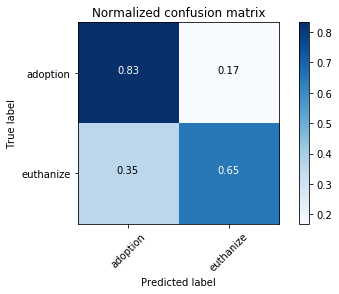

Accuracy is:  0.7456822676334871



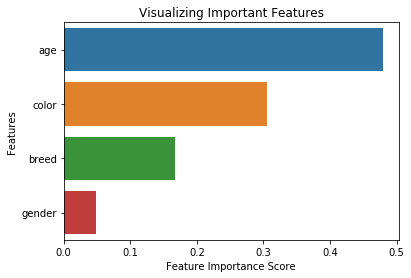


----------------------------
Combo Dogs Results without Louisville
----------------------------


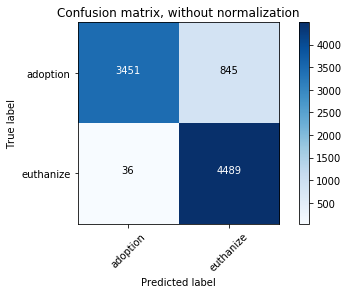

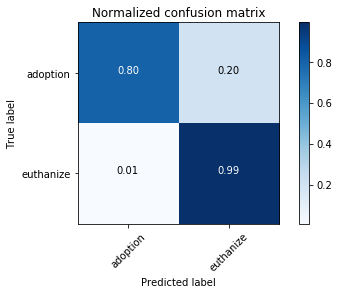

Accuracy is:  0.9001247024146922



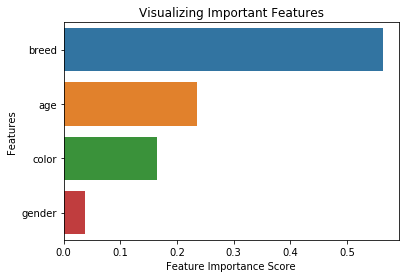


----------------------------


In [18]:
#read data from combined cats file without louisville data
raw = pd.read_csv('combocatsintaewol.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Combo Cats Results without Louisville')
visuals2(testLabels, y_pred)

#print(feature_imp)
#--------------------------------------------------------------------------------------
#read data from combined dogs file without louisville data
raw = pd.read_csv('combodogsintaewol.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Combo Dogs Results without Louisville')
visuals2(testLabels, y_pred)

#use this to print the test labels, predictions, and the features to see which animals were correctly and incorrectly predicted
for i in range(len(testLabels)):
    print(i, testLabels[i], y_pred[i], testFeatures[i])

#print(feature_imp)

In [19]:
def testAccuracy(trainLabels, y_pred):
    x=10
    upper = 200
    length = int(upper/x)
    a = np.zeros(shape=(length,2))
    i = 0
    while x <= upper:
        classifier = RandomForestClassifier(n_estimators=x, random_state=0)  
        classifier.fit(trainFeatures, trainLabels)  
        y_pred = classifier.predict(testFeatures)

        #print(y_pred, testLabels)
        accuracy = accuracy_score(testLabels, y_pred) 
        a[i] = [x, accuracy]
        x = x+10
        i = i+1
    print(a)


#read data for combined dogs with adoption and euthanasia labels only
raw = pd.read_csv('combodogsintae.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

print('combodogsintae.csv')
testAccuracy(trainLabels, y_pred)

#read data for combined dogs with adoption and euthanasia labels only
raw = pd.read_csv('combocatsintae.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values
print('combocatsintae.csv')
testAccuracy(trainLabels, y_pred)

combodogsintae.csv
[[ 10.           0.84591332]
 [ 20.           0.84693136]
 [ 30.           0.84634962]
 [ 40.           0.84765852]
 [ 50.           0.84780396]
 [ 60.           0.84780396]
 [ 70.           0.84765852]
 [ 80.           0.84736766]
 [ 90.           0.84758581]
 [100.           0.84744037]
 [110.           0.84744037]
 [120.           0.84744037]
 [130.           0.84744037]
 [140.           0.84744037]
 [150.           0.84744037]
 [160.           0.84744037]
 [170.           0.84744037]
 [180.           0.84744037]
 [190.           0.84744037]
 [200.           0.84744037]]
combocatsintae.csv
[[ 10.           0.70758316]
 [ 20.           0.70831939]
 [ 30.           0.70805167]
 [ 40.           0.70805167]
 [ 50.           0.70852018]
 [ 60.           0.70852018]
 [ 70.           0.70825246]
 [ 80.           0.70825246]
 [ 90.           0.70825246]
 [100.           0.70831939]
 [110.           0.70791781]
 [120.           0.70791781]
 [130.           0.70791781]
 [14

In [58]:
raw = pd.read_csv('combocatsintae.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Combo Cats Results')


#use this to print the test labels, predictions, and the features to see which animals were correctly and incorrectly predicted
for i in range(len(testLabels)):
    print(i, testLabels[i], y_pred[i], testFeatures[i])

Combo Cats Results
0 2 2 [  9  24  40 106]
1 2 1 [ 10  25  56 106]
2 1 1 [ 10  24  74 105]
3 1 1 [ 12  24  40 106]
4 2 2 [ 11  24  72 106]
5 2 1 [ 10  25  61 105]
6 1 2 [ 12  25  39 105]
7 1 1 [ 10  24  55 106]
8 1 1 [ 10  24  54 106]
9 1 1 [ 10  31  70 106]
10 1 2 [ 12  25  56 105]
11 1 1 [ 10  24  40 106]
12 2 1 [ 10  24  73 106]
13 2 2 [ 12  25  56 106]
14 1 1 [  9  20  61 105]
15 1 2 [ 12  25  40 106]
16 1 1 [ 10  22  40 106]
17 1 1 [  9  25  96 105]
18 2 1 [ 10  24  95 105]
19 1 1 [ 10  24  55 106]
20 1 1 [ 10  23  40 106]
21 2 1 [ 10  24  83 106]
22 1 1 [ 10  23 100 106]
23 1 1 [ 10  24  39 106]
24 1 1 [ 10  24  55 105]
25 1 1 [ 10  22  55 106]
26 2 2 [ 12  22  39 105]
27 1 1 [ 10  20  40 106]
28 2 1 [ 12  24  62 105]
29 1 1 [ 12  20  95 105]
30 1 1 [ 10  20  40 106]
31 2 1 [ 10  24  40 105]
32 1 2 [ 12  25  93 105]
33 2 2 [  9  25  95 105]
34 2 2 [  9  24  72 105]
35 1 1 [ 10  25  40 106]
36 1 1 [ 10  24  74 105]
37 1 1 [ 10  24  56 105]
38 2 1 [ 10  25  56 106]
39 2 2 [  9  25 

418 2 1 [ 10  25  40 106]
419 2 1 [ 10  22  55 106]
420 2 1 [ 10  25 100 105]
421 2 2 [ 12  25  40 106]
422 2 1 [ 12  24  74 106]
423 2 1 [ 10  24  40 106]
424 1 2 [ 12  24  72 105]
425 1 1 [ 10  25  55 106]
426 2 2 [ 12  25  55 105]
427 1 1 [ 10  24  40 105]
428 2 1 [ 10  24  55 105]
429 2 1 [ 10  24  55 105]
430 2 2 [  9  25 100 106]
431 2 2 [  9  25  56 106]
432 2 1 [ 10  25  55 106]
433 1 2 [ 12  25  56 106]
434 2 2 [ 11  25  39 106]
435 1 1 [ 12  20  40 105]
436 2 1 [ 10  24  61 105]
437 1 1 [ 10  32  79 105]
438 2 2 [ 10  21  40 106]
439 1 1 [ 12  24  74 105]
440 1 1 [ 10  22  62 105]
441 2 1 [ 10  25  93 105]
442 2 2 [  9  25  40 105]
443 2 1 [ 12  24  74 106]
444 2 1 [ 10  24  39 106]
445 1 1 [ 10  21  52 106]
446 2 2 [ 10  24  69 106]
447 1 1 [ 12  24  54 105]
448 2 1 [ 10  24  40 105]
449 2 2 [  9  25  56 106]
450 2 1 [ 10  24  40 105]
451 1 1 [ 10  25  40 105]
452 2 1 [ 10  25  39 105]
453 1 1 [ 10  20  39 105]
454 1 1 [ 10  24  40 105]
455 1 1 [  9  24  83 106]
456 2 2 [ 11

1043 1 1 [  9  24  49 105]
1044 2 2 [ 12  25  39 105]
1045 1 1 [ 12  25  84 105]
1046 1 1 [ 10  22  72 105]
1047 1 1 [ 10  24  73 106]
1048 1 1 [ 10  24  76 106]
1049 1 1 [ 10  24  61 105]
1050 2 1 [ 10  25  84 106]
1051 1 1 [ 10  25  47 106]
1052 2 1 [ 10  25  55 106]
1053 2 2 [ 12  25  39 106]
1054 1 1 [ 10  25  50 105]
1055 2 1 [ 10  24  73 105]
1056 2 2 [ 12  25  39 105]
1057 1 1 [ 10  24 100 105]
1058 1 1 [ 10  24  39 106]
1059 1 1 [ 12  24 100 105]
1060 1 1 [ 10  24 100 105]
1061 2 1 [ 10  24  81 105]
1062 2 2 [ 11  24  40 105]
1063 1 1 [ 10  24  73 106]
1064 1 1 [ 10  24  46 106]
1065 1 1 [ 10  25  55 106]
1066 1 1 [  9  24 100 105]
1067 1 1 [ 10  22  55 105]
1068 2 2 [ 11  24  55 105]
1069 1 1 [ 10  20  95 105]
1070 1 1 [ 10  25  96 105]
1071 2 1 [ 10  25  95 105]
1072 1 1 [  9  24  84 106]
1073 1 1 [ 10  20  83 106]
1074 1 1 [ 10  24  84 106]
1075 1 1 [ 10  24  62 105]
1076 1 1 [ 10  25  39 105]
1077 1 1 [ 12  23  39 105]
1078 1 1 [ 10  24  83 106]
1079 2 1 [ 10  24  39 105]
1

1357 1 1 [ 10  20  39 106]
1358 1 1 [ 10  24  75 106]
1359 1 1 [ 10  22  40 105]
1360 1 2 [ 12  25  39 106]
1361 1 1 [ 10  25 100 105]
1362 1 1 [ 10  22  72 106]
1363 1 1 [  9  24  83 106]
1364 2 2 [ 11  24  95 105]
1365 2 2 [ 11  25  83 106]
1366 2 1 [ 10  25  55 105]
1367 2 1 [ 12  20  40 106]
1368 1 1 [ 12  24  84 106]
1369 2 1 [ 10  25  40 106]
1370 2 2 [  9  24  73 105]
1371 1 2 [ 11  25  61 105]
1372 1 2 [ 12  24  55 106]
1373 2 2 [ 12  25  39 105]
1374 1 1 [ 10  22  83 106]
1375 2 1 [  9  24  61 105]
1376 2 1 [ 10  24  55 106]
1377 2 2 [ 12  24  39 105]
1378 2 1 [ 12  24  72 106]
1379 1 1 [ 10  24  40 105]
1380 2 2 [ 11  24  99 105]
1381 2 2 [ 12  24  43 106]
1382 2 1 [ 10  25  55 106]
1383 1 2 [ 12  25  40 105]
1384 2 1 [ 10  25  55 106]
1385 2 2 [ 12  25  40 105]
1386 1 1 [ 10  25 100 106]
1387 2 1 [ 10  25  55 106]
1388 1 1 [ 10  25  40 106]
1389 2 2 [  9  25  83 106]
1390 2 2 [ 12  24  86 106]
1391 2 2 [ 12  25  55 106]
1392 1 1 [ 10  24  85 105]
1393 1 1 [ 10  25  39 106]
1

1668 1 1 [ 10  24  39 106]
1669 2 2 [ 12  25  55 105]
1670 1 1 [ 10  25  52 105]
1671 1 1 [ 10  24  74 105]
1672 2 1 [ 10  22  39 105]
1673 1 1 [ 10  24  62 105]
1674 2 1 [ 10  24  61 105]
1675 2 1 [ 12  24  55 105]
1676 1 1 [ 10  25  69 105]
1677 1 1 [ 10  25  55 105]
1678 1 1 [ 10  21  84 106]
1679 2 1 [ 10  25  83 106]
1680 1 1 [ 10  25  95 105]
1681 2 1 [ 10  25  83 106]
1682 2 1 [ 10  24  39 106]
1683 1 1 [ 10  25 100 106]
1684 1 1 [ 10  25  69 106]
1685 2 2 [  9  25  40 106]
1686 2 2 [ 12  24  92 106]
1687 1 1 [ 10  24  73 105]
1688 2 1 [ 12  24  61 105]
1689 1 1 [  9  25  47 106]
1690 2 1 [ 10  25  56 106]
1691 1 1 [ 10  25  56 105]
1692 1 1 [ 10  24  55 105]
1693 1 1 [  9  21  95 105]
1694 1 1 [ 12  24  40 105]
1695 1 1 [ 10  25  93 105]
1696 2 1 [ 10  22  40 105]
1697 2 2 [ 12  24  39 106]
1698 1 1 [ 10  25  83 105]
1699 2 2 [ 12  25  56 105]
1700 1 1 [ 10  24  74 105]
1701 1 1 [ 12  24  73 105]
1702 2 1 [ 10  25  55 105]
1703 1 1 [ 10  32  78 105]
1704 1 1 [ 10  24  95 105]
1

2035 1 1 [ 10  24  95 105]
2036 2 2 [ 11  24  40 105]
2037 1 1 [ 10  25  55 105]
2038 1 1 [ 10  24  74 105]
2039 2 2 [ 12  25  55 106]
2040 2 1 [ 10  25  39 106]
2041 1 2 [ 12  24  39 105]
2042 1 1 [ 12  24  73 106]
2043 2 2 [ 11  25  56 105]
2044 2 2 [ 12  25  55 105]
2045 2 2 [ 12  25  40 106]
2046 1 1 [ 10  24  56 106]
2047 2 1 [ 10  24  75 106]
2048 2 1 [ 10  24  56 106]
2049 1 1 [ 10  24  61 105]
2050 2 2 [ 11  24  99 106]
2051 2 2 [ 11  25  39 105]
2052 1 1 [ 12  25  47 105]
2053 2 1 [ 12  24  75 105]
2054 2 1 [ 12  24  72 106]
2055 2 1 [ 10  24 100 106]
2056 1 1 [  9  25  99 105]
2057 1 1 [ 12  24 100 105]
2058 2 1 [ 10  24  55 105]
2059 1 1 [ 10  24  61 105]
2060 2 1 [  9  24  95 105]
2061 2 2 [ 11  22  39 106]
2062 1 1 [  9  24  95 105]
2063 2 1 [ 10  25  56 106]
2064 1 1 [ 12  30  47 105]
2065 1 1 [ 10  24  55 106]
2066 1 1 [ 12  22  73 106]
2067 1 1 [ 10  24  39 105]
2068 1 1 [ 10  25  95 105]
2069 2 1 [ 10  24  75 106]
2070 1 1 [ 10  25  39 106]
2071 1 1 [ 12  22  40 106]
2

2668 1 1 [ 10  24  39 106]
2669 2 1 [ 10  24  39 105]
2670 2 2 [  9  25  83 106]
2671 1 2 [  9  24  99 105]
2672 2 1 [ 10  25 100 106]
2673 1 1 [ 10  25  40 106]
2674 2 2 [ 11  24  95 105]
2675 1 1 [ 10  25  93 105]
2676 1 1 [ 10  24 100 105]
2677 1 1 [ 10  24  87 105]
2678 1 1 [ 12  24 100 106]
2679 2 2 [ 12  25  56 105]
2680 1 2 [ 12  25  56 106]
2681 2 1 [ 10  24  40 105]
2682 2 1 [ 10  24  76 105]
2683 2 2 [ 11  20  40 105]
2684 1 1 [ 10  25  40 106]
2685 1 1 [ 10  25  83 106]
2686 2 1 [ 10  24  40 105]
2687 1 1 [ 10  24  55 106]
2688 1 1 [ 10  24  81 106]
2689 2 1 [ 10  25  55 105]
2690 1 1 [ 10  25  83 105]
2691 1 1 [ 12  24  95 105]
2692 2 1 [  9  24  40 105]
2693 1 1 [ 10  24  72 106]
2694 2 1 [ 10  24  59 106]
2695 1 1 [ 10  24  40 106]
2696 1 2 [ 12  25  40 105]
2697 1 1 [ 10  25  56 105]
2698 1 1 [ 10  20  99 105]
2699 2 2 [ 10  20  74 105]
2700 1 2 [ 11  24  39 106]
2701 1 2 [ 12  25 100 105]
2702 1 2 [ 12  24  55 106]
2703 2 1 [ 10  22  74 105]
2704 2 1 [ 10  24  40 105]
2

3042 2 1 [ 10  24  85 106]
3043 1 1 [ 10  25  50 106]
3044 1 1 [ 10  24  40 105]
3045 2 1 [ 10  24  39 105]
3046 2 1 [ 12  24  40 106]
3047 1 1 [ 10  24  72 106]
3048 1 1 [ 10  24  95 105]
3049 2 1 [ 10  24  72 105]
3050 2 1 [ 10  24  83 106]
3051 1 1 [ 12  25  50 105]
3052 2 1 [ 10  24  39 106]
3053 2 1 [ 10  25  39 105]
3054 1 1 [ 10  24  81 105]
3055 2 1 [ 12  24  40 105]
3056 1 1 [ 10  24  40 106]
3057 1 1 [ 12  24  40 105]
3058 1 1 [ 10  20  74 106]
3059 2 1 [ 10  24  74 106]
3060 2 1 [ 10  25  56 105]
3061 2 1 [ 10  24  39 105]
3062 1 1 [  9  24 100 106]
3063 2 2 [ 11  25  39 105]
3064 1 1 [ 10  24  74 105]
3065 1 1 [ 10  24  39 106]
3066 1 1 [ 10  25  47 105]
3067 1 1 [ 10  24  40 106]
3068 2 1 [ 10  24  40 105]
3069 1 1 [ 10  24  40 106]
3070 1 1 [ 10  24  72 105]
3071 1 1 [ 10  22  74 106]
3072 1 2 [ 12  25  39 106]
3073 1 1 [ 10  25  55 106]
3074 2 1 [ 10  24  61 105]
3075 2 1 [ 10  25  39 106]
3076 1 1 [ 10  24  61 105]
3077 1 1 [ 10  24 100 106]
3078 1 1 [ 10  24  96 105]
3

3417 1 1 [ 10  24  55 105]
3418 1 1 [ 10  24  74 105]
3419 1 1 [ 10  25  39 105]
3420 2 2 [ 12  25  39 106]
3421 2 2 [  9  24  40 106]
3422 2 1 [ 10  25  61 105]
3423 2 1 [ 10  25  39 106]
3424 1 1 [ 10  24  56 105]
3425 2 1 [  9  24 100 106]
3426 1 1 [ 10  24  56 106]
3427 2 2 [ 11  24  73 105]
3428 1 1 [ 10  25  55 106]
3429 1 1 [ 10  24  59 106]
3430 1 1 [ 10  24  39 106]
3431 1 2 [ 10  23  55 105]
3432 2 2 [ 12  25  93 105]
3433 1 2 [ 12  25  93 105]
3434 2 2 [  9  25  56 106]
3435 2 2 [  9  25  95 105]
3436 2 2 [ 12  25  39 106]
3437 1 2 [ 12  25  40 105]
3438 1 2 [  9  24  62 105]
3439 1 1 [ 10  24  39 106]
3440 1 1 [ 10  25  56 105]
3441 1 1 [ 10  24  39 105]
3442 2 2 [ 11  24  72 105]
3443 1 1 [ 10  24  40 105]
3444 2 2 [ 11  24  96 105]
3445 2 2 [ 11  24  62 105]
3446 1 1 [ 12  24  73 105]
3447 2 1 [ 10  25  55 105]
3448 1 1 [ 10  17  39 106]
3449 2 2 [  9  24  82 105]
3450 2 1 [ 10  24  39 106]
3451 1 1 [ 10  24  40 105]
3452 2 1 [ 10  24  46 106]
3453 1 1 [ 12  24  55 105]
3

3792 1 1 [ 10  24  81 106]
3793 1 1 [ 10  24  55 106]
3794 1 1 [  9  24  61 105]
3795 2 1 [ 10  24  40 106]
3796 2 2 [ 12  24  72 105]
3797 2 2 [ 12  24  84 105]
3798 1 2 [ 12  24  43 106]
3799 2 1 [ 10  25  40 106]
3800 2 2 [ 12  25  55 105]
3801 2 2 [ 11  24  95 105]
3802 2 2 [ 11  24  72 105]
3803 1 1 [ 10  20  96 105]
3804 2 2 [ 12  25  53 106]
3805 2 2 [ 12  25  95 105]
3806 2 1 [ 12  24  55 105]
3807 2 1 [  9  24 100 105]
3808 1 1 [ 12  24 100 106]
3809 2 1 [ 10  25  52 106]
3810 2 2 [ 12  25  47 106]
3811 1 1 [ 10  24  56 106]
3812 2 2 [ 11  24  56 105]
3813 1 1 [ 10  25  47 105]
3814 1 1 [ 10  25  39 106]
3815 2 2 [ 12  25  40 106]
3816 1 1 [ 12  25  69 105]
3817 2 2 [ 11  25  83 105]
3818 1 2 [ 12  25  56 105]
3819 1 1 [ 10  24  55 106]
3820 1 2 [  9  24  73 105]
3821 2 1 [ 12  24  95 105]
3822 1 2 [ 12  25  39 106]
3823 1 1 [ 10  25  56 106]
3824 1 1 [ 10  22  61 105]
3825 1 1 [ 10  25  40 105]
3826 2 1 [ 10  25  56 106]
3827 2 1 [ 10  24  74 105]
3828 2 1 [ 10  24  74 105]
3

4167 1 1 [ 12  24 100 106]
4168 1 1 [ 10  22  40 105]
4169 1 1 [ 12  24  40 106]
4170 1 1 [ 10  24  40 105]
4171 1 1 [ 10  24  72 105]
4172 2 2 [  9  25 100 106]
4173 1 1 [ 10  25  53 105]
4174 2 1 [ 10  25  55 106]
4175 2 1 [ 10  25  83 105]
4176 1 1 [ 10  25  55 105]
4177 1 1 [ 10  24  99 106]
4178 2 2 [  9  25  83 106]
4179 2 1 [ 10  22  75 106]
4180 2 1 [ 10  25  56 105]
4181 1 1 [ 10  25  94 105]
4182 2 2 [ 12  25  50 106]
4183 1 1 [ 10  24  82 106]
4184 1 1 [ 12  24  96 105]
4185 2 2 [ 12  25  52 105]
4186 2 1 [ 12  20  40 105]
4187 1 1 [ 10  24  61 105]
4188 1 1 [ 10  24  61 105]
4189 2 1 [ 10  24  56 106]
4190 1 1 [ 10  24  40 105]
4191 1 1 [ 10  24  39 106]
4192 1 1 [ 10  25  55 105]
4193 1 1 [ 12  24  40 105]
4194 1 1 [ 12  31  97 105]
4195 2 1 [ 10  25  55 105]
4196 1 1 [ 12  24  56 105]
4197 1 1 [ 10  25  55 106]
4198 2 2 [ 12  25  40 105]
4199 2 1 [ 10  22  73 106]
4200 2 2 [  9  25  56 105]
4201 1 1 [ 10  25  84 106]
4202 2 2 [ 11  24  96 105]
4203 1 2 [ 12  25  40 106]
4

4542 1 1 [ 10  32  70 106]
4543 1 1 [ 10  24  56 105]
4544 2 2 [  9  25  40 106]
4545 1 1 [ 12  24  55 105]
4546 2 2 [ 11  25  55 106]
4547 1 1 [ 10  24  73 106]
4548 1 1 [ 10  24  75 106]
4549 2 1 [ 10  25  56 106]
4550 2 2 [ 11  24  39 106]
4551 2 2 [  9  24  39 106]
4552 1 1 [ 10  25  93 105]
4553 2 2 [ 12  25  50 106]
4554 1 1 [ 10  25  56 105]
4555 1 1 [  9  25  93 105]
4556 1 1 [ 12  20  56 105]
4557 1 1 [ 10  24  74 105]
4558 2 2 [ 12  24  55 106]
4559 2 2 [ 12  25  55 106]
4560 1 1 [ 10  25  84 106]
4561 1 1 [ 10  24  39 106]
4562 1 1 [ 10  25  55 106]
4563 2 1 [ 12  24  81 106]
4564 2 2 [ 11  25  55 105]
4565 2 1 [ 10  25  55 106]
4566 1 1 [ 10  24  59 106]
4567 1 1 [ 12  24  62 105]
4568 1 2 [ 12  22  40 105]
4569 1 1 [ 10  24  81 106]
4570 1 2 [ 12  25  39 105]
4571 1 2 [  9  25  56 105]
4572 2 2 [  9  20  40 106]
4573 2 2 [ 11  24  72 105]
4574 2 2 [ 11  24  40 106]
4575 2 2 [  9  24  81 106]
4576 1 1 [ 10  25  55 105]
4577 2 2 [ 11  25  95 105]
4578 2 2 [ 11  24  83 106]
4

4917 1 2 [ 12  24  84 105]
4918 1 1 [ 10  25  39 106]
4919 2 1 [ 10  25  55 105]
4920 1 1 [ 10  25  39 106]
4921 1 1 [ 10  25  39 106]
4922 1 1 [ 10  24  95 105]
4923 2 1 [ 12  24  61 105]
4924 1 1 [ 10  24  39 105]
4925 2 2 [ 12  24  55 106]
4926 1 1 [ 10  25  47 105]
4927 1 1 [ 12  24  81 106]
4928 2 1 [ 10  24  55 106]
4929 1 1 [ 10  24  55 105]
4930 1 1 [ 10  25  40 106]
4931 2 1 [ 10  24  82 106]
4932 2 1 [ 10  24  45 106]
4933 2 1 [ 10  25  83 106]
4934 2 1 [ 10  24  82 106]
4935 1 1 [ 10  24  39 105]
4936 2 2 [  9  25  55 105]
4937 1 1 [ 10  24  59 106]
4938 2 2 [ 11  24  54 106]
4939 2 1 [ 10  24  61 105]
4940 1 1 [ 10  24  56 105]
4941 2 1 [ 12  24 100 105]
4942 1 1 [ 10  22  39 105]
4943 2 2 [ 10  23  55 105]
4944 1 1 [  9  24  95 105]
4945 2 1 [ 10  25  84 106]
4946 1 1 [ 10  25  61 105]
4947 1 1 [ 10  24  76 106]
4948 1 1 [ 12  24  74 105]
4949 1 1 [  9  24  56 106]
4950 2 2 [  9  24  73 105]
4951 2 2 [  9  24  99 105]
4952 1 2 [ 12  25  47 106]
4953 2 1 [ 10  24  77 105]
4

5273 1 2 [ 12  25  39 106]
5274 2 2 [ 10  25  99 106]
5275 2 1 [ 12  24  56 105]
5276 2 2 [  9  25  40 106]
5277 2 2 [ 11  24  96 105]
5278 2 2 [  9  24  81 106]
5279 1 2 [ 11  25  83 106]
5280 1 1 [ 10  24  75 105]
5281 1 1 [ 10  24  43 106]
5282 1 1 [ 10  24  40 106]
5283 2 2 [  9  25  40 105]
5284 2 2 [ 12  25  61 105]
5285 1 1 [ 10  21  55 105]
5286 2 1 [ 10  25  56 106]
5287 2 2 [  9  24  72 106]
5288 1 1 [ 10  24  40 106]
5289 1 1 [ 10  24  40 106]
5290 2 1 [ 12  20  40 106]
5291 2 2 [ 10  23  55 105]
5292 1 2 [  9  24  62 105]
5293 2 2 [ 12  25  40 106]
5294 1 1 [ 10  25  40 106]
5295 2 2 [ 12  24  39 105]
5296 1 1 [ 10  23  41 106]
5297 2 1 [ 10  25  39 105]
5298 2 2 [ 12  25  55 105]
5299 1 1 [ 10  22  39 106]
5300 1 1 [ 12  24  56 105]
5301 1 1 [ 10  31  70 106]
5302 1 2 [ 12  25  55 106]
5303 2 2 [ 12  25  47 106]
5304 1 1 [ 10  24  81 106]
5305 1 1 [ 10  24  83 106]
5306 1 1 [ 10  32  79 105]
5307 2 2 [ 12  24  39 105]
5308 2 1 [ 10  24 100 105]
5309 2 1 [ 12  24  55 105]
5

5916 1 1 [ 10  24  75 105]
5917 1 1 [ 10  24  55 106]
5918 2 1 [ 10  25  83 106]
5919 2 1 [ 10  24  55 105]
5920 1 1 [ 10  25  55 106]
5921 1 1 [ 10  24  83 106]
5922 2 1 [ 10  25  55 106]
5923 2 1 [ 10  25  55 105]
5924 2 1 [ 10  24  55 106]
5925 1 1 [ 10  24  57 106]
5926 2 2 [ 12  25  84 106]
5927 1 1 [ 10  25  55 106]
5928 1 2 [ 12  24  55 106]
5929 1 1 [ 10  25  47 105]
5930 2 1 [ 10  24  74 105]
5931 2 2 [ 12  24  39 105]
5932 1 1 [ 12  20  83 106]
5933 2 2 [ 12  25  56 106]
5934 1 1 [ 12  23  39 106]
5935 1 1 [ 10  25  83 106]
5936 2 1 [ 10  25  83 106]
5937 1 1 [ 10  24  85 105]
5938 1 2 [ 12  24  55 106]
5939 1 1 [  9  24  39 105]
5940 2 1 [ 12  24  73 105]
5941 1 1 [ 10  24  81 106]
5942 2 1 [ 10  24  75 105]
5943 2 2 [ 12  25  40 106]
5944 1 1 [ 12  24 100 106]
5945 2 1 [  9  24 100 105]
5946 1 1 [ 10  31  79 105]
5947 1 1 [ 10  24  96 105]
5948 1 1 [  9  24  56 106]
5949 1 1 [ 10  24  44 106]
5950 2 1 [ 10  25  56 106]
5951 1 1 [ 10  25  40 105]
5952 1 1 [ 10  25  83 106]
5

6291 1 1 [ 10  24  73 106]
6292 2 2 [ 12  25  39 106]
6293 2 1 [ 10  25  93 105]
6294 2 1 [ 10  25  39 105]
6295 1 1 [ 10  25  55 105]
6296 1 1 [ 10  24  59 106]
6297 1 1 [ 12  24  61 105]
6298 1 1 [  9  29  72 105]
6299 2 2 [  9  25  39 105]
6300 1 1 [ 10  24  57 106]
6301 1 1 [ 10  24  74 105]
6302 1 1 [ 12  24  56 105]
6303 1 1 [ 10  24  83 105]
6304 1 1 [ 10  24  55 105]
6305 1 1 [ 10  24  61 105]
6306 2 2 [ 11  24  40 105]
6307 2 1 [ 10  24 100 105]
6308 1 1 [ 12  24  55 105]
6309 2 2 [ 12  25  39 106]
6310 2 2 [  9  25 100 106]
6311 2 2 [ 10  22  75 105]
6312 1 1 [ 10  22  56 105]
6313 1 1 [ 10  24  99 105]
6314 2 2 [ 12  25  40 106]
6315 2 1 [ 10  22  62 105]
6316 2 1 [ 12  24 100 106]
6317 2 2 [ 11  25  39 106]
6318 2 1 [ 10  24  40 106]
6319 2 2 [ 12  25  55 106]
6320 1 1 [ 10  25  55 106]
6321 2 2 [ 10  24  57 105]
6322 1 1 [ 10  25  61 105]
6323 2 2 [ 12  25  83 106]
6324 1 1 [ 12  24  56 106]
6325 1 1 [ 12  24  73 106]
6326 1 1 [ 10  25  55 106]
6327 1 1 [ 10  25  69 106]
6

6666 1 1 [ 12  24  95 105]
6667 2 2 [ 10  21  40 106]
6668 1 1 [ 10  24 100 106]
6669 1 1 [ 10  24  39 106]
6670 1 1 [ 10  24  39 106]
6671 1 1 [ 12  24  75 105]
6672 1 1 [ 10  25  83 106]
6673 1 1 [ 10  32  79 105]
6674 2 1 [ 10  24  39 105]
6675 2 2 [  9  24  40 106]
6676 1 2 [ 11  24  40 105]
6677 2 2 [ 12  25  61 105]
6678 1 1 [ 10  24  72 105]
6679 1 1 [ 10  25  39 106]
6680 2 2 [ 11  24  83 106]
6681 1 1 [ 10  25  55 105]
6682 1 1 [ 10  24  55 105]
6683 1 1 [ 10  25  84 105]
6684 2 1 [ 10  25  47 106]
6685 1 1 [ 10  22  39 106]
6686 1 1 [ 12  24  40 105]
6687 2 2 [ 12  25  55 106]
6688 1 1 [ 10  32  78 106]
6689 1 1 [ 10  32  79 106]
6690 1 1 [ 10  25  39 106]
6691 1 1 [ 10  25 100 106]
6692 2 2 [ 12  24  60 106]
6693 1 1 [ 10  25  55 105]
6694 2 2 [ 12  25  50 106]
6695 2 1 [ 10  25  83 106]
6696 1 1 [ 10  25  95 105]
6697 1 1 [ 10  24  39 105]
6698 1 2 [ 12  25  83 106]
6699 2 2 [ 12  25  40 106]
6700 1 1 [ 10  25  68 106]
6701 1 1 [ 10  20  74 106]
6702 1 1 [ 12  24  75 106]
6

7041 2 2 [ 11  24  55 105]
7042 2 2 [ 12  25  55 106]
7043 2 1 [ 10  22  61 105]
7044 1 1 [ 10  24  40 105]
7045 1 1 [ 10  24  40 105]
7046 2 2 [ 12  25  83 106]
7047 2 2 [ 12  25  55 106]
7048 1 1 [ 12  25  47 105]
7049 1 1 [ 10  25  39 105]
7050 2 2 [ 12  25  39 106]
7051 2 2 [ 12  25  55 106]
7052 1 1 [ 10  24  55 106]
7053 2 2 [ 10  21  40 106]
7054 1 1 [ 10  24  40 106]
7055 2 1 [ 10  24  74 105]
7056 1 1 [ 10  25  52 105]
7057 2 2 [ 12  24  39 106]
7058 2 2 [ 11  21  95 105]
7059 1 1 [  9  24  61 105]
7060 1 1 [ 10  22  84 106]
7061 1 1 [ 10  25  83 106]
7062 1 2 [  9  25  56 106]
7063 1 1 [ 10  22  73 106]
7064 2 1 [ 10  24  39 105]
7065 2 2 [ 11  21  95 105]
7066 1 1 [ 10  32  88 105]
7067 2 1 [ 10  25  40 105]
7068 1 2 [ 12  24  55 106]
7069 1 1 [ 10  21  93 105]
7070 2 2 [ 12  25  39 106]
7071 1 1 [ 10  25  39 106]
7072 2 1 [ 10  24  75 105]
7073 1 2 [  9  24  40 106]
7074 1 1 [ 10  24  39 105]
7075 2 1 [ 10  24  84 105]
7076 1 1 [ 10  24  72 105]
7077 1 1 [ 10  25 100 105]
7

7416 1 2 [ 12  25  39 106]
7417 2 1 [ 10  22 100 105]
7418 1 1 [ 12  25  84 105]
7419 1 1 [  9  24  56 105]
7420 1 1 [ 12  20  40 106]
7421 2 1 [ 10  24  39 106]
7422 1 1 [ 10  24  99 105]
7423 1 2 [ 12  25  40 105]
7424 1 1 [ 10  24  40 106]
7425 2 2 [ 11  24  72 105]
7426 2 2 [ 11  25  39 105]
7427 1 2 [ 12  24  39 106]
7428 1 1 [ 10  24 100 106]
7429 2 1 [ 10  25  40 106]
7430 1 1 [ 10  24  55 105]
7431 1 1 [ 10  24  82 106]
7432 1 1 [ 10  24  56 106]
7433 2 2 [ 12  25  40 105]
7434 2 1 [ 10  22  39 105]
7435 2 1 [ 10  24  68 106]
7436 1 1 [ 10  24  61 105]
7437 2 2 [ 11  25  40 105]
7438 1 1 [ 10  24  55 105]
7439 2 1 [ 12  24  61 105]
7440 1 1 [  9  24  96 105]
7441 1 1 [ 10  23  55 106]
7442 2 2 [ 12  25  95 105]
7443 1 2 [ 12  25  55 105]
7444 1 1 [ 10  25  84 106]
7445 1 1 [ 10  24  74 105]
7446 2 1 [ 10  25  55 106]
7447 2 1 [ 10  25  56 106]
7448 1 1 [ 10  25  55 106]
7449 2 1 [  9  24  39 105]
7450 1 1 [ 10  22  95 105]
7451 2 1 [ 10  24  39 106]
7452 2 2 [ 12  24  72 105]
7

7791 2 1 [ 12  24  75 105]
7792 1 1 [ 10  20  61 105]
7793 2 2 [ 12  24  39 106]
7794 1 1 [ 10  25  40 106]
7795 1 1 [ 10  25  40 106]
7796 2 1 [ 10  25  39 106]
7797 2 1 [ 10  25  84 106]
7798 2 2 [ 12  25  50 106]
7799 2 2 [  9  24  55 106]
7800 1 1 [ 10  24  59 105]
7801 1 1 [ 10  25  55 106]
7802 1 1 [  9  20  39 106]
7803 1 1 [ 12  25  47 105]
7804 1 1 [ 10  24  76 105]
7805 1 1 [ 10  24  40 106]
7806 1 1 [ 10  24 100 105]
7807 1 2 [  9  24  72 106]
7808 1 1 [ 10  25  53 105]
7809 1 1 [ 10  24  55 106]
7810 2 2 [ 11  24  61 105]
7811 2 1 [ 10  24  62 105]
7812 1 1 [ 12  24  96 105]
7813 2 1 [ 10  25  55 105]
7814 1 2 [ 12  24  55 106]
7815 1 1 [ 10  24  59 106]
7816 1 1 [ 10  25  56 106]
7817 2 2 [ 12  24  82 105]
7818 2 1 [ 10  24  55 106]
7819 1 2 [  9  24  55 105]
7820 1 1 [ 12  24  95 105]
7821 1 1 [ 10  25  39 106]
7822 2 1 [ 10  25  56 106]
7823 1 2 [ 12  24  39 105]
7824 1 1 [ 10  24  68 105]
7825 1 1 [ 10  25  39 106]
7826 2 2 [  9  24  72 105]
7827 1 1 [ 10  25  75 106]
7

8166 2 2 [ 12  25  39 106]
8167 1 1 [ 10  22  39 105]
8168 2 2 [ 12  24  55 106]
8169 1 1 [ 10  25  55 105]
8170 1 1 [ 10  25  90 106]
8171 2 1 [ 12  24  56 105]
8172 1 1 [ 10  25  84 106]
8173 1 1 [ 10  24  96 105]
8174 1 1 [ 10  25  56 105]
8175 1 1 [ 10  24  44 105]
8176 1 1 [ 12  20  39 105]
8177 1 1 [ 10  25  52 106]
8178 1 1 [ 10  24  74 105]
8179 2 2 [  9  25  39 106]
8180 2 1 [ 10  22  39 106]
8181 1 1 [ 10  24  62 105]
8182 1 1 [ 10  24  95 105]
8183 1 1 [ 12  22 100 106]
8184 1 1 [  9  24  84 106]
8185 2 1 [ 10  24  39 105]
8186 2 2 [ 12  24  39 106]
8187 2 2 [ 12  24  55 106]
8188 1 1 [ 10  24  40 105]
8189 1 1 [ 12  22 100 105]
8190 1 1 [ 10  24  96 105]
8191 2 2 [ 11  24  96 105]
8192 1 1 [ 10  24 100 106]
8193 1 1 [ 10  24  61 105]
8194 1 1 [ 12  25  47 105]
8195 2 2 [ 11  25  39 106]
8196 2 2 [ 12  24  98 105]
8197 1 1 [ 10  32  70 106]
8198 1 1 [ 10  25  62 105]
8199 1 1 [ 10  25  55 105]
8200 2 2 [ 12  25  50 106]
8201 2 2 [ 12  25  39 106]
8202 2 1 [  9  24  39 105]
8

8541 1 1 [ 10  22  72 106]
8542 1 1 [ 12  24  40 106]
8543 2 1 [ 10  25  84 106]
8544 2 2 [  9  24  55 106]
8545 2 2 [ 10  23  39 106]
8546 2 1 [ 10  25  55 106]
8547 2 2 [  9  22 100 106]
8548 2 1 [ 10  24  74 106]
8549 1 1 [ 10  25  83 106]
8550 1 1 [ 10  22  55 105]
8551 1 1 [ 10  24  39 106]
8552 2 2 [ 12  25  40 106]
8553 2 1 [ 10  25  40 106]
8554 1 1 [ 10  24  61 105]
8555 2 2 [ 11  25  83 106]
8556 2 2 [ 12  22  73 105]
8557 2 1 [ 10  25  56 106]
8558 1 1 [  9  22  84 106]
8559 2 1 [ 10  24  44 106]
8560 1 1 [ 10  24  83 105]
8561 1 1 [ 12  21  39 105]
8562 1 1 [ 10  24  40 105]
8563 1 2 [  9  25  61 105]
8564 1 1 [ 10  24  49 105]
8565 2 2 [ 12  25  55 106]
8566 1 2 [ 12  25  56 106]
8567 1 1 [ 10  25  39 106]
8568 2 1 [ 12  24  61 105]
8569 2 2 [ 11  21  95 105]
8570 1 1 [ 10  25  95 105]
8571 1 1 [ 12  20  40 105]
8572 2 2 [  9  25  39 106]
8573 1 1 [ 10  25  93 105]
8574 2 1 [ 10  22  72 106]
8575 1 1 [ 12  24 100 106]
8576 2 1 [ 10  25  84 106]
8577 1 1 [ 10  25 100 105]
8

8915 1 1 [ 10  25  61 105]
8916 1 1 [ 10  25  83 106]
8917 1 1 [  9  24  56 106]
8918 2 1 [ 10  24  39 106]
8919 1 1 [  9  27  56 105]
8920 2 2 [ 11  24  40 105]
8921 1 1 [ 10  21  47 105]
8922 1 2 [  9  25  95 105]
8923 1 1 [ 10  24  95 105]
8924 2 2 [  9  22  73 106]
8925 1 1 [ 10  25  39 106]
8926 1 1 [ 12  25  94 105]
8927 1 1 [ 10  25  69 106]
8928 2 1 [ 10  25  39 106]
8929 2 1 [ 10  25  55 105]
8930 1 1 [ 10  25  55 105]
8931 2 2 [ 11  25  83 106]
8932 1 1 [  9  26  55 106]
8933 2 2 [ 12  25  39 105]
8934 1 1 [ 10  25  55 106]
8935 1 1 [ 10  24  55 105]
8936 2 1 [ 10  25  40 105]
8937 2 2 [ 11  24  72 106]
8938 1 1 [ 10  22  96 105]
8939 1 1 [ 12  24  61 105]
8940 2 1 [ 10  24  72 105]
8941 2 1 [ 10  24  40 105]
8942 2 1 [ 12  24  96 105]
8943 2 2 [ 11  24  39 106]
8944 2 1 [ 10  24  83 106]
8945 1 1 [ 10  25  61 105]
8946 2 1 [ 10  24  39 106]
8947 1 1 [ 12  24  95 105]
8948 1 2 [ 12  24  72 105]
8949 2 1 [ 10  24  96 105]
8950 1 1 [ 10  24  62 105]
8951 1 2 [ 10  24  82 105]
8

9290 1 1 [ 10  24  83 106]
9291 1 1 [ 10  21  55 106]
9292 1 2 [ 12  24  39 106]
9293 1 1 [ 10  22  96 105]
9294 2 1 [ 10  24  39 106]
9295 2 1 [ 12  24  77 105]
9296 2 2 [ 11  24  82 105]
9297 1 1 [ 12  24  55 105]
9298 2 2 [ 12  24  39 106]
9299 2 2 [ 12  25  39 106]
9300 1 1 [ 10  24  39 106]
9301 1 1 [ 12  24  74 105]
9302 1 1 [ 10  24  84 106]
9303 2 1 [ 10  25  52 105]
9304 1 1 [ 10  25  50 105]
9305 1 1 [ 10  25  55 106]
9306 1 2 [ 12  24  82 105]
9307 1 1 [ 10  24  40 105]
9308 2 2 [ 11  21  95 105]
9309 1 1 [ 10  24  74 105]
9310 1 2 [ 12  25  39 106]
9311 2 2 [  9  25  83 106]
9312 2 1 [ 10  25  55 105]
9313 2 1 [ 10  24  83 106]
9314 1 1 [ 12  24  54 105]
9315 1 1 [ 10  24  74 106]
9316 1 1 [ 10  25  95 105]
9317 2 1 [ 10  25  39 105]
9318 1 1 [ 10  24  95 105]
9319 1 1 [ 10  24  68 106]
9320 1 1 [ 10  25 100 105]
9321 1 1 [  9  21  61 105]
9322 1 1 [ 10  22  55 105]
9323 1 1 [ 12  24  99 106]
9324 1 1 [  9  24  95 105]
9325 1 1 [ 10  24  55 106]
9326 2 1 [ 10  25  40 106]
9

9665 2 1 [ 10  24  73 105]
9666 1 1 [ 12  24  40 105]
9667 1 1 [ 10  24  95 105]
9668 1 1 [ 10  23  56 106]
9669 1 1 [ 10  24  95 105]
9670 2 1 [ 10  25  56 106]
9671 2 2 [ 11  25  39 106]
9672 2 1 [ 12  24  40 106]
9673 1 1 [ 10  24  83 106]
9674 1 1 [ 10  25  39 106]
9675 1 1 [ 12  24  83 106]
9676 1 2 [ 12  25  83 106]
9677 2 1 [ 10  25  40 106]
9678 1 1 [ 10  25  39 106]
9679 2 1 [ 10  24  61 105]
9680 1 1 [ 10  23  40 105]
9681 2 2 [ 12  25  50 106]
9682 2 2 [ 12  25  61 105]
9683 1 1 [ 10  24  62 105]
9684 2 1 [  9  24  96 105]
9685 1 1 [ 10  25  56 105]
9686 1 1 [ 10  24  56 106]
9687 1 2 [  9  24  55 105]
9688 1 1 [ 10  24  40 105]
9689 2 2 [ 11  25  39 106]
9690 1 1 [ 10  24  73 105]
9691 2 2 [ 12  22  40 105]
9692 1 1 [  9  24  96 105]
9693 1 1 [ 10  25  40 106]
9694 1 1 [ 10  25  50 106]
9695 1 1 [ 10  24  83 106]
9696 2 2 [ 12  22  73 105]
9697 1 1 [ 10  22  72 106]
9698 2 2 [ 11  20  95 105]
9699 2 1 [  9  24  84 106]
9700 2 1 [ 10  25  83 106]
9701 1 2 [ 12  25  56 106]
9

10040 2 2 [  9  25  40 106]
10041 2 1 [ 12  24  55 105]
10042 1 1 [ 10  24  82 106]
10043 1 1 [ 10  25 100 105]
10044 1 1 [ 10  24  83 105]
10045 2 2 [ 12  25  56 105]
10046 1 2 [ 12  24  39 105]
10047 1 1 [ 10  24  39 106]
10048 2 2 [ 12  25  40 105]
10049 1 2 [ 10  23  39 106]
10050 1 1 [ 10  24  83 106]
10051 1 1 [ 10  25  40 106]
10052 1 1 [  9  24 100 106]
10053 1 1 [ 10  25  41 106]
10054 2 1 [ 12  24  40 106]
10055 2 1 [ 10  24  39 105]
10056 2 2 [ 11  24  99 105]
10057 1 1 [ 12  24  72 106]
10058 1 1 [ 10  24  39 105]
10059 2 2 [  9  25  55 106]
10060 2 2 [ 12  25  39 106]
10061 1 1 [ 10  24  55 106]
10062 1 2 [  9  25 100 106]
10063 1 2 [  9  24  55 106]
10064 2 1 [ 10  24  40 105]
10065 2 2 [  9  22  39 105]
10066 2 1 [ 12  24  96 105]
10067 2 1 [ 12  24  40 105]
10068 1 2 [  9  24  40 106]
10069 2 2 [ 12  25  56 106]
10070 2 2 [ 11  24  39 106]
10071 2 1 [ 12  24  40 106]
10072 1 1 [ 10  25  83 106]
10073 2 1 [ 10  24  81 106]
10074 2 2 [ 11  25 100 106]
10075 1 1 [ 10  25  

10403 1 1 [ 10  24  39 105]
10404 2 1 [ 12  24  56 105]
10405 2 2 [  9  25  55 106]
10406 1 1 [ 12  24  74 105]
10407 1 2 [  9  25  55 105]
10408 2 2 [  9  25  40 106]
10409 1 1 [ 10  24  72 105]
10410 2 1 [ 10  24  55 105]
10411 1 1 [ 10  24  55 106]
10412 1 2 [  9  24  55 105]
10413 1 1 [ 10  25  53 105]
10414 1 1 [ 10  25  95 105]
10415 1 1 [ 10  25  40 105]
10416 2 1 [ 10  25 100 105]
10417 1 1 [ 10  24  84 105]
10418 1 1 [ 12  24  56 105]
10419 1 2 [ 12  25  55 105]
10420 1 1 [ 10  24  61 105]
10421 1 1 [ 10  24 100 105]
10422 1 1 [  9  24 100 106]
10423 1 1 [ 10  24  56 105]
10424 1 1 [ 10  25  50 106]
10425 2 2 [ 11  25  56 105]
10426 2 1 [ 10  25  40 106]
10427 1 1 [ 10  24  59 105]
10428 2 1 [ 10  25 100 106]
10429 1 1 [ 10  24  55 105]
10430 1 2 [ 10  24  45 105]
10431 1 1 [ 10  25  56 105]
10432 1 1 [ 10  25  84 105]
10433 1 2 [ 12  24  39 105]
10434 1 1 [ 10  24  40 105]
10435 2 2 [ 12  25  39 106]
10436 2 2 [ 12  25  50 106]
10437 1 1 [ 10  25  55 105]
10438 1 1 [ 10  24  

11040 2 2 [  9  24  55 105]
11041 2 2 [ 11  25  39 106]
11042 2 1 [ 12  24  59 105]
11043 1 1 [ 10  24  61 105]
11044 2 2 [ 12  25  83 106]
11045 1 1 [ 10  24  75 105]
11046 2 2 [ 11  24  40 106]
11047 1 2 [ 12  25  55 106]
11048 2 2 [  9  25  39 105]
11049 1 1 [ 10  32  70 106]
11050 2 2 [ 12  25  83 106]
11051 1 2 [ 12  24  39 105]
11052 2 2 [  9  25  95 105]
11053 1 1 [ 10  24  82 106]
11054 1 1 [ 10  24  68 106]
11055 2 1 [ 10  24  81 105]
11056 1 1 [ 10  25  55 105]
11057 1 1 [ 10  20  62 105]
11058 1 1 [ 10  24  55 105]
11059 1 2 [  9  25  56 106]
11060 1 1 [ 12  24  74 106]
11061 1 2 [ 12  20 100 105]
11062 1 1 [ 10  25  41 105]
11063 2 2 [ 11  24  40 105]
11064 2 1 [ 10  24  72 106]
11065 1 1 [  9  24  39 105]
11066 2 2 [ 12  25  83 106]
11067 2 1 [ 12  24  40 106]
11068 2 2 [ 12  25  39 106]
11069 2 2 [ 12  25  39 106]
11070 1 1 [ 10  24  73 105]
11071 1 1 [ 12  25  53 105]
11072 2 2 [  9  25 100 106]
11073 1 1 [ 10  24  73 105]
11074 2 2 [  9  25  56 105]
11075 2 1 [ 10  25  

11415 1 1 [ 10  25  56 106]
11416 1 2 [  9  25  40 105]
11417 1 2 [ 12  25  84 106]
11418 1 1 [ 10  24  96 105]
11419 1 1 [ 10  25  50 106]
11420 2 1 [ 10  24  39 105]
11421 2 1 [ 10  24  55 105]
11422 1 1 [ 10  25  55 106]
11423 1 1 [  9  24  61 105]
11424 2 2 [ 12  24  83 105]
11425 1 1 [ 12  24  99 106]
11426 2 2 [ 12  25  55 106]
11427 1 1 [ 10  24  39 105]
11428 2 1 [ 10  24  40 105]
11429 1 1 [ 10  25  95 105]
11430 2 1 [ 12  24 100 105]
11431 1 1 [ 10  25  84 106]
11432 1 1 [  9  24  56 105]
11433 2 1 [ 10  24  83 105]
11434 2 1 [ 10  25  39 105]
11435 1 1 [ 10  25  61 105]
11436 2 1 [ 10  25  55 105]
11437 1 1 [ 10  24  72 105]
11438 1 1 [ 10  24 100 105]
11439 2 2 [ 11  25  39 106]
11440 1 1 [ 12  24  61 105]
11441 1 1 [ 10  23  40 105]
11442 1 1 [  9  24 100 106]
11443 1 2 [ 12  25  83 106]
11444 2 1 [ 10  24  39 106]
11445 2 2 [ 12  25  39 105]
11446 1 1 [ 10  24  72 106]
11447 1 1 [ 10  21  55 106]
11448 1 1 [ 10  24  40 106]
11449 1 1 [ 10  24  39 105]
11450 1 2 [ 12  25  

11789 1 2 [ 12  25  56 105]
11790 2 2 [  9  24  39 106]
11791 1 1 [ 12  20 100 106]
11792 2 1 [ 12  24  74 105]
11793 1 1 [ 12  24  56 106]
11794 2 2 [ 12  24  39 106]
11795 2 2 [  9  24  82 106]
11796 1 1 [ 10  24  55 105]
11797 1 1 [ 10  25  56 105]
11798 2 1 [ 10  22  56 106]
11799 2 2 [ 12  25  56 105]
11800 1 1 [ 10  25  55 105]
11801 1 1 [ 10  23  68 106]
11802 2 2 [ 11  24  40 106]
11803 1 1 [ 10  24  73 105]
11804 2 1 [ 12  24  99 105]
11805 1 1 [ 10  25  68 106]
11806 2 1 [ 12  24  56 106]
11807 2 1 [ 10  25  39 106]
11808 2 2 [ 11  25  39 106]
11809 1 1 [ 10  22  72 106]
11810 1 2 [  9  24  55 106]
11811 2 1 [ 10  25  40 106]
11812 2 1 [ 10  24  62 105]
11813 2 1 [ 10  25  39 106]
11814 1 1 [ 10  25  99 105]
11815 1 1 [ 10  24  72 106]
11816 2 1 [ 10  24  62 105]
11817 2 1 [ 10  25  56 106]
11818 2 1 [ 10  24  39 105]
11819 1 1 [ 10  25  56 105]
11820 1 1 [ 10  25  56 106]
11821 1 1 [  9  24  39 105]
11822 1 1 [ 10  24  40 106]
11823 2 2 [ 11  31  87 105]
11824 1 2 [ 12  25  

12164 1 1 [ 12  25 100 106]
12165 2 2 [ 10  17  76 105]
12166 1 1 [ 10  24  39 105]
12167 2 2 [ 11  24  55 105]
12168 1 1 [ 12  22  55 105]
12169 2 1 [ 10  24  40 106]
12170 1 1 [ 10  25  56 105]
12171 1 1 [ 10  20  39 105]
12172 1 1 [ 10  24  40 105]
12173 1 2 [ 12  25  39 106]
12174 2 2 [ 11  25  40 105]
12175 1 1 [ 10  24  83 105]
12176 1 1 [ 10  24  55 105]
12177 1 1 [ 10  23  55 106]
12178 1 1 [ 12  23 100 106]
12179 2 2 [  9  25 100 106]
12180 1 1 [ 10  23  68 106]
12181 1 1 [ 10  25  39 106]
12182 2 1 [ 10  25  56 106]
12183 2 1 [  9  24  83 106]
12184 1 1 [ 10  25  40 106]
12185 1 1 [  9  25  62 105]
12186 2 1 [ 10  25  39 106]
12187 1 1 [ 10  24  39 106]
12188 2 1 [ 10  24 100 106]
12189 1 1 [ 10  24 100 106]
12190 2 1 [ 10  25  55 105]
12191 2 2 [ 11  24  56 105]
12192 1 1 [ 12  24  83 106]
12193 2 1 [ 12  24  95 105]
12194 2 2 [  9  25  55 106]
12195 1 1 [ 10  24  72 105]
12196 2 1 [ 10  25  39 106]
12197 2 1 [ 10  24  95 105]
12198 1 1 [ 12  24  56 106]
12199 1 1 [ 10  24  

12539 2 2 [  9  25  56 105]
12540 1 2 [ 10  24  82 105]
12541 2 2 [ 10  25  99 106]
12542 1 1 [ 10  24  40 106]
12543 2 2 [ 12  25  83 106]
12544 1 1 [ 12  24 100 105]
12545 1 1 [ 10  24  73 105]
12546 1 2 [ 12  25  93 105]
12547 2 1 [  9  24 100 105]
12548 1 1 [ 10  25  55 106]
12549 1 1 [ 10  24  40 106]
12550 2 2 [ 10  24  82 105]
12551 1 1 [ 10  25  84 106]
12552 1 1 [ 10  22  55 105]
12553 1 1 [ 10  25  40 106]
12554 1 1 [ 10  24  55 105]
12555 1 1 [ 10  32  87 106]
12556 1 1 [ 10  22  73 106]
12557 1 1 [ 10  25 100 106]
12558 2 1 [ 10  24  40 105]
12559 1 1 [ 10  24  39 105]
12560 2 1 [ 10  25  40 106]
12561 1 1 [ 10  25  40 105]
12562 1 1 [  9  25  47 105]
12563 2 1 [ 10  25  39 105]
12564 1 1 [ 10  24  75 105]
12565 1 2 [ 12  25  55 105]
12566 2 2 [ 11  24  40 105]
12567 2 1 [ 10  25  84 106]
12568 1 1 [ 10  25  40 106]
12569 1 2 [  9  25  56 105]
12570 1 2 [ 12  24  43 105]
12571 1 1 [ 10  24  95 105]
12572 2 1 [ 10  25  93 105]
12573 2 2 [ 12  24  39 105]
12574 2 2 [ 12  25  

12914 1 2 [  9  25  55 105]
12915 1 1 [ 10  24  62 105]
12916 2 1 [ 10  22  39 106]
12917 2 1 [ 10  24  82 106]
12918 2 2 [ 12  25  95 105]
12919 2 2 [ 12  25  83 106]
12920 2 1 [ 12  24  96 105]
12921 2 2 [ 12  24  39 105]
12922 2 2 [ 12  25  93 105]
12923 1 1 [ 10  24  75 105]
12924 2 1 [ 10  24  56 105]
12925 1 1 [ 10  25  55 105]
12926 1 1 [ 10  24  72 105]
12927 1 1 [ 10  24  74 106]
12928 2 2 [ 12  25  39 105]
12929 1 1 [ 10  25  61 105]
12930 1 1 [ 10  32  79 105]
12931 2 1 [ 12  24  73 106]
12932 1 1 [ 10  24  39 105]
12933 2 2 [ 12  25  55 105]
12934 1 1 [ 12  24  81 106]
12935 2 2 [  9  20  55 105]
12936 2 1 [ 10  24  55 106]
12937 1 1 [ 10  24  39 105]
12938 2 1 [ 10  25  56 106]
12939 2 2 [ 11  25  55 106]
12940 2 1 [ 10  24  84 106]
12941 1 1 [ 12  24  96 105]
12942 1 1 [ 10  22  62 105]
12943 1 1 [ 10  25  61 105]
12944 1 1 [ 12  24  55 105]
12945 1 1 [ 10  24  62 105]
12946 2 2 [ 12  25  56 105]
12947 1 1 [ 10  24  81 106]
12948 1 1 [ 12  24  72 106]
12949 2 1 [ 12  24  

13289 2 1 [ 10  24  40 106]
13290 2 1 [ 10  24  74 105]
13291 1 1 [  9  25  93 105]
13292 2 1 [ 10  25  55 105]
13293 2 2 [ 10  23  55 105]
13294 2 1 [ 10  24  56 106]
13295 2 2 [ 12  25  55 106]
13296 1 1 [ 10  25  40 106]
13297 2 1 [ 10  22  72 106]
13298 2 1 [  9  24  95 105]
13299 1 1 [ 10  25  95 105]
13300 2 1 [ 10  24  40 105]
13301 1 1 [ 10  24  55 106]
13302 2 1 [ 12  24  56 105]
13303 1 1 [ 12  24  56 105]
13304 1 1 [ 10  20  55 105]
13305 2 2 [ 11  24  74 106]
13306 1 2 [  9  24  62 105]
13307 1 1 [ 10  24  72 105]
13308 1 1 [ 10  25  55 105]
13309 1 1 [ 10  24  74 105]
13310 1 1 [ 10  23  69 105]
13311 1 1 [ 10  25  55 106]
13312 2 2 [ 12  25  40 106]
13313 1 1 [ 12  24  55 105]
13314 1 1 [ 10  24  72 106]
13315 2 1 [ 10  25  39 106]
13316 1 1 [ 10  24  55 105]
13317 1 1 [ 10  24 100 106]
13318 1 1 [ 12  24  82 106]
13319 2 1 [ 10  25 100 105]
13320 2 2 [ 12  25  56 105]
13321 1 1 [ 10  24  83 106]
13322 2 1 [ 10  24  40 106]
13323 2 2 [  9  24  74 106]
13324 1 1 [ 10  25  

13664 2 1 [ 10  24  99 106]
13665 2 1 [ 12  24  44 106]
13666 1 1 [ 10  25  39 106]
13667 2 1 [ 10  25 100 106]
13668 1 1 [ 10  25  55 105]
13669 1 1 [ 10  24  39 105]
13670 1 1 [ 10  25  47 106]
13671 2 2 [  9  25  40 106]
13672 1 1 [ 10  23  39 105]
13673 1 1 [ 10  25  83 106]
13674 2 2 [  9  25  56 105]
13675 1 1 [ 10  24  74 106]
13676 1 1 [ 10  22  73 105]
13677 1 1 [ 12  25  47 105]
13678 1 1 [ 10  24  40 105]
13679 2 2 [ 12  25  55 106]
13680 1 2 [ 12  25  61 105]
13681 1 1 [ 10  25  47 105]
13682 2 2 [ 11  24  40 105]
13683 1 1 [ 10  24  87 105]
13684 1 2 [ 12  25  95 105]
13685 1 1 [ 12  22  62 105]
13686 2 2 [ 11  25  95 105]
13687 2 2 [ 11  25  55 105]
13688 2 2 [ 12  24  86 106]
13689 1 1 [ 10  22  59 106]
13690 1 1 [ 10  25  53 106]
13691 1 1 [ 10  27  55 106]
13692 2 2 [ 11  25  39 105]
13693 1 1 [ 10  25  93 105]
13694 1 2 [  9  20  40 105]
13695 1 1 [ 10  24  55 106]
13696 2 1 [ 12  24  96 105]
13697 1 2 [ 12  25  40 106]
13698 1 2 [ 12  24  82 105]
13699 2 2 [ 11  21  

14039 1 1 [ 10  24  55 105]
14040 1 1 [ 10  24  73 105]
14041 2 2 [ 12  17  39 106]
14042 1 2 [ 12  24  39 105]
14043 2 1 [ 10  22  74 106]
14044 1 1 [ 10  20  40 105]
14045 1 1 [ 12  31  87 105]
14046 2 2 [  9  25  61 105]
14047 2 1 [ 10  25  55 105]
14048 2 2 [ 12  24  77 106]
14049 2 1 [ 10  25  83 106]
14050 1 1 [ 10  25  39 106]
14051 2 1 [ 10  25 100 106]
14052 1 1 [ 10  24 100 105]
14053 1 1 [ 10  31  79 105]
14054 2 1 [ 10  25  61 105]
14055 1 1 [ 12  25 100 106]
14056 2 1 [ 10  24  85 106]
14057 1 1 [ 10  25  56 106]
14058 2 2 [  9  25  55 106]
14059 2 2 [ 10  23  39 106]
14060 1 1 [ 12  24  55 105]
14061 2 2 [ 11  24  72 105]
14062 2 1 [ 12  20  40 106]
14063 2 1 [ 10  25 100 106]
14064 1 1 [ 10  24  83 106]
14065 1 1 [ 10  20 100 105]
14066 2 1 [ 10  24  95 105]
14067 1 1 [ 10  25  83 105]
14068 1 1 [ 10  24  73 105]
14069 2 1 [ 10  24  74 105]
14070 1 1 [ 10  24  39 105]
14071 2 2 [ 11  24  61 105]
14072 2 2 [ 11  24  40 106]
14073 1 2 [ 12  25  55 105]
14074 1 1 [ 10  24  

14414 1 1 [  9  24  43 106]
14415 1 1 [ 10  23  93 105]
14416 1 2 [ 12  25  40 105]
14417 2 1 [ 10  24  55 105]
14418 1 1 [ 10  22  74 106]
14419 2 1 [ 10  24  81 106]
14420 2 1 [ 12  24  84 106]
14421 2 2 [ 12  25  55 106]
14422 2 1 [ 12  24  44 105]
14423 1 1 [ 10  25  61 105]
14424 1 1 [ 10  22  75 106]
14425 1 2 [  9  24  74 106]
14426 1 1 [ 10  24  55 106]
14427 1 1 [ 10  24  39 105]
14428 2 1 [ 10  25  55 106]
14429 1 1 [ 12  24  40 106]
14430 2 1 [ 10  25  95 105]
14431 2 1 [ 10  24  72 105]
14432 2 1 [ 12  24 100 105]
14433 2 1 [ 10  24  55 106]
14434 2 2 [ 12  25  39 106]
14435 1 1 [ 10  25  40 105]
14436 1 1 [ 12  24  59 106]
14437 2 2 [ 11  24  40 105]
14438 2 1 [ 12  24 100 105]
14439 1 2 [ 12  25  55 105]
14440 1 1 [ 10  24  74 106]
14441 2 1 [ 12  24  74 105]
14442 2 2 [  9  25  56 105]
14443 2 1 [ 10  24  39 106]
14444 2 2 [ 12  25  40 106]
14445 2 1 [ 10  25  55 105]
14446 1 1 [ 12  24  81 106]
14447 1 1 [ 10  24  40 106]
14448 1 1 [ 10  25  39 105]
14449 1 2 [  9  25  

14788 1 1 [ 10  25  53 105]
14789 2 1 [ 10  25  50 106]
14790 1 1 [ 10  24  55 106]
14791 1 1 [ 12  24  62 105]
14792 1 2 [ 11  25  40 105]
14793 1 1 [ 10  24  40 105]
14794 1 1 [  9  22  39 106]
14795 1 2 [  9  24  72 106]
14796 2 2 [  9  24  62 105]
14797 2 1 [ 10  24  39 105]
14798 2 1 [ 10  24  55 106]
14799 1 1 [ 10  25  56 106]
14800 2 1 [ 10  24  39 106]
14801 1 1 [ 10  25  39 106]
14802 1 2 [ 12  25  56 105]
14803 1 1 [ 12  24  40 105]
14804 1 1 [ 10  24  39 105]
14805 2 2 [ 12  24  72 105]
14806 1 1 [ 10  21 100 105]
14807 2 2 [ 12  25  55 105]
14808 1 1 [ 10  25  55 105]
14809 1 1 [ 10  25  52 106]
14810 1 1 [ 10  25  94 105]
14811 1 1 [ 10  20  55 105]
14812 2 2 [ 11  24  55 105]
14813 1 1 [ 10  24  95 105]
14814 2 2 [  9  24  39 106]
14815 2 2 [ 11  25 100 106]
14816 2 1 [ 10  25  56 105]
14817 1 1 [ 10  25  47 106]
14818 1 1 [ 10  25  68 105]
14819 2 1 [ 10  24  72 106]
14820 1 1 [ 10  25  61 105]
14821 1 2 [ 12  25  40 105]
14822 1 1 [ 10  24  39 106]
14823 1 1 [ 10  24 1

In [56]:
raw = pd.read_csv('combodogsintae.csv', header=0)

# Shuffle data and split it into train and test sets:
shuffled = raw.sample(frac=1) # randomly re-order the examples
trainFrac = 0.7 # 70%/30% train/test split
trainCount = int(len(raw) * trainFrac)
train = shuffled[:trainCount]
test = shuffled[trainCount:]

trainLabels = train['outcome'].values
testLabels = test['outcome'].values

trainFeatures = train.drop(['outcome'], axis=1).values
testFeatures = test.drop(['outcome'], axis=1).values

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(trainFeatures, trainLabels)  
y_pred = classifier.predict(testFeatures)

#print(y_pred, testLabels)
print('Combo Dogs Results')


#use this to print the test labels, predictions, and the features to see which animals were correctly and incorrectly predicted
for i in range(len(testLabels)):
    print(i, testLabels[i], y_pred[i], testFeatures[i])

Combo Dogs Results
0 2 2 [  9 103 164 214]
1 2 2 [  9  39 180 213]
2 1 1 [  9 115 204 213]
3 2 2 [  9 124 176 214]
4 1 1 [  9 125 194 213]
5 2 2 [ 12 124 205 214]
6 2 2 [ 12 125 201 214]
7 1 1 [ 12  80 164 213]
8 2 1 [ 12  40 202 213]
9 2 1 [  9  40 205 213]
10 2 2 [ 12 125 194 214]
11 2 1 [  9 100 205 214]
12 2 2 [ 12 125 184 214]
13 2 2 [ 12 125 171 214]
14 2 2 [ 12  94  47 214]
15 1 1 [ 10 103 201 213]
16 2 2 [ 12 125  47 214]
17 1 2 [ 12 125 205 213]
18 1 1 [ 12  37 205 214]
19 1 1 [ 10 103 176 213]
20 1 1 [ 10  31 180 214]
21 1 1 [ 10  56 180 214]
22 2 2 [ 12 124 171 214]
23 1 1 [ 10  94 180 213]
24 1 1 [  9  66 175 214]
25 1 1 [ 12  80 205 213]
26 2 2 [ 12 125 205 213]
27 1 1 [ 12  40 202 213]
28 2 2 [ 12 124 194 213]
29 2 2 [ 12 140  47 214]
30 2 2 [ 12 125 205 214]
31 1 1 [ 12 103 180 213]
32 1 1 [ 10 125 180 214]
33 2 2 [  9 125 180 214]
34 2 2 [ 12  70  47 214]
35 1 1 [ 10 103 175 214]
36 2 2 [ 12 125 204 213]
37 2 2 [ 12 125 184 214]
38 1 2 [ 12 125 205 214]
39 1 2 [ 12 125 

414 1 1 [ 10  94 201 214]
415 1 1 [ 10 103 164 214]
416 1 1 [ 10 125  47 213]
417 2 1 [ 10 125 201 213]
418 2 2 [ 12 125 184 214]
419 2 2 [ 12 125  47 213]
420 1 1 [  9  40 202 213]
421 1 1 [ 10 102 164 214]
422 2 1 [ 10 140  47 214]
423 1 1 [ 10 103 200 213]
424 1 1 [ 12 143 164 213]
425 2 2 [  9 102 183 214]
426 2 2 [ 12 124 205 214]
427 2 2 [ 12  94  47 214]
428 1 1 [  9  40 205 213]
429 2 2 [ 12 125 201 214]
430 2 1 [ 12 103  47 213]
431 2 2 [ 11  73 164 214]
432 2 2 [ 12 124 205 213]
433 1 1 [ 12  40 202 214]
434 2 2 [ 11 118  47 214]
435 1 1 [ 12  40  47 213]
436 2 2 [ 12 125 171 214]
437 2 2 [ 12 125 171 213]
438 1 1 [  9 103 164 213]
439 2 2 [ 12 125 168 214]
440 2 2 [ 12 125 201 214]
441 1 1 [ 10 120 205 214]
442 2 2 [  9 125 171 214]
443 2 2 [ 12  70 200 214]
444 1 1 [ 10  64 202 213]
445 2 2 [ 11 114 204 214]
446 2 2 [ 11 102 164 213]
447 2 2 [ 12 125 184 214]
448 2 2 [ 12 125 180 213]
449 2 2 [ 12 125 194 213]
450 2 2 [ 12 124  47 213]
451 1 1 [ 10 102 164 213]
452 1 1 [ 10

1025 1 1 [ 10 103  47 214]
1026 1 1 [ 12  68 202 213]
1027 2 2 [  9 139  47 214]
1028 1 2 [ 12 124 192 214]
1029 1 1 [ 10 103 194 214]
1030 1 2 [ 12 103 164 213]
1031 1 1 [ 10  38 205 214]
1032 1 1 [ 12 103 175 214]
1033 1 1 [ 12  94 202 213]
1034 1 2 [ 12  70 201 213]
1035 2 1 [  9 103 183 213]
1036 1 1 [ 12  69 201 213]
1037 2 2 [ 11 140 164 213]
1038 2 2 [ 12 125 205 214]
1039 1 1 [  9  31 205 214]
1040 2 2 [ 10 124  47 213]
1041 2 2 [ 12 124 180 214]
1042 2 2 [ 12 124 188 214]
1043 2 2 [ 11  73 164 214]
1044 2 2 [ 11  39 202 214]
1045 1 2 [ 12 103 164 213]
1046 2 1 [ 10 125  47 214]
1047 2 2 [ 12 124 171 213]
1048 2 2 [  9  50  47 214]
1049 1 1 [ 10  51  47 213]
1050 2 2 [  9 103  47 214]
1051 1 1 [ 10  70 202 213]
1052 2 2 [ 12 124 204 214]
1053 2 2 [ 11 118 180 213]
1054 1 1 [ 10 125 177 213]
1055 1 1 [ 12 121  47 214]
1056 2 2 [ 12 125 200 213]
1057 1 1 [ 12 149  47 213]
1058 2 1 [ 11 115 204 214]
1059 1 1 [ 10 103 205 214]
1060 2 2 [  9 125 171 214]
1061 2 2 [ 12  93  47 213]
1

1583 2 2 [ 12 125 171 214]
1584 1 1 [ 12  51  47 213]
1585 1 1 [ 12 101 202 213]
1586 2 1 [ 10 140  47 213]
1587 2 2 [ 12 125 171 213]
1588 2 2 [ 12 140  47 214]
1589 1 1 [ 10  40  47 213]
1590 2 2 [ 12 124 168 214]
1591 1 2 [ 12 125 171 214]
1592 2 2 [ 10 124 205 213]
1593 1 1 [ 10  56 177 214]
1594 2 2 [ 10 124 201 214]
1595 1 1 [ 12  39 202 214]
1596 2 1 [  9 103  47 213]
1597 1 2 [ 12 124  47 214]
1598 2 2 [ 12 125 184 214]
1599 1 1 [ 12 103  47 214]
1600 1 1 [ 10  32  47 213]
1601 2 2 [  9 140  47 213]
1602 1 2 [ 12 124 180 213]
1603 2 2 [ 11  73 175 213]
1604 1 1 [ 10  51 205 214]
1605 2 2 [  9 124 194 214]
1606 1 2 [ 12 125 205 213]
1607 2 2 [ 12  70  47 214]
1608 2 2 [  9 139  47 214]
1609 2 2 [ 12  26 176 213]
1610 2 2 [ 12 125 205 213]
1611 2 1 [ 12 103 201 214]
1612 1 1 [ 10 103  47 214]
1613 2 2 [  9 124 171 214]
1614 1 1 [ 10  80  47 214]
1615 1 1 [ 12 101 205 214]
1616 2 2 [ 12 125 204 213]
1617 2 2 [ 10 125 171 213]
1618 1 1 [ 10  94  47 213]
1619 2 2 [  9 125 177 214]
1

1913 1 2 [ 12  70  47 214]
1914 2 2 [ 11  39 202 213]
1915 1 1 [ 10 103 164 213]
1916 1 1 [ 12  69 201 213]
1917 1 1 [ 10 103 175 214]
1918 2 2 [ 12 103 164 214]
1919 1 1 [ 12  31 205 213]
1920 2 1 [ 12 103  47 214]
1921 1 1 [  9  40 205 213]
1922 2 2 [ 12 124  47 214]
1923 2 2 [ 12 124 205 214]
1924 2 2 [ 12 125 176 214]
1925 2 2 [  9 139  47 214]
1926 1 1 [ 12 154 204 214]
1927 1 1 [ 10  94 201 213]
1928 1 1 [ 10 103  47 213]
1929 1 1 [ 10  64 205 214]
1930 1 1 [ 12 115 204 213]
1931 1 2 [ 12 125  47 213]
1932 2 2 [  9  93  47 213]
1933 2 2 [ 12 124 192 214]
1934 1 1 [ 12 107 204 214]
1935 2 2 [ 12 125 180 214]
1936 1 1 [ 12  32  47 213]
1937 1 2 [ 12 103 164 213]
1938 1 1 [ 12 115 204 214]
1939 1 1 [ 10  68 200 213]
1940 2 2 [ 12 140  47 214]
1941 2 2 [ 10 124 164 214]
1942 1 1 [ 12 135 205 213]
1943 2 2 [  9 140  47 213]
1944 1 1 [ 12 136  47 213]
1945 2 2 [ 12 125  47 213]
1946 1 1 [ 10 103 183 214]
1947 2 2 [ 11  94  47 214]
1948 2 2 [  9 145  47 213]
1949 1 1 [ 10  70 205 213]
1

2273 1 2 [  9 103  47 214]
2274 1 1 [ 12  40 203 214]
2275 1 1 [ 10  70 201 213]
2276 2 1 [ 12  51 205 213]
2277 2 2 [ 12 125 180 214]
2278 2 2 [ 12 125 164 214]
2279 1 2 [ 12  93  47 214]
2280 2 2 [  9 124 175 214]
2281 2 2 [ 10 124 205 214]
2282 1 1 [ 12  51  47 214]
2283 1 2 [  9  93  47 213]
2284 2 1 [ 12 103 201 214]
2285 1 1 [ 10  50  47 214]
2286 2 2 [ 12  94  47 214]
2287 2 2 [ 12 124  47 213]
2288 2 2 [ 12 125 171 213]
2289 2 1 [  9 100 205 214]
2290 2 2 [ 10  73 180 214]
2291 1 2 [ 12 125 180 213]
2292 2 2 [ 12 125 171 214]
2293 2 2 [ 12 125 201 214]
2294 1 2 [ 12 124 171 214]
2295 1 1 [ 12 103  47 213]
2296 1 1 [ 12  94 180 214]
2297 1 1 [ 12  70 176 213]
2298 2 2 [ 12  70 200 214]
2299 2 2 [ 11 140  47 214]
2300 1 1 [ 12  39 202 213]
2301 2 2 [ 12 125 180 213]
2302 1 1 [ 10 103 180 213]
2303 2 2 [ 12 125  47 214]
2304 2 2 [ 12 125 194 213]
2305 2 1 [ 10 125 205 214]
2306 2 2 [  9 103 164 214]
2307 1 2 [ 12  70 180 214]
2308 2 2 [ 12  70  47 214]
2309 1 1 [ 12  51  47 213]
2

2898 1 1 [ 12  70 164 213]
2899 2 2 [ 11  70  47 213]
2900 1 1 [ 10 125  47 214]
2901 2 2 [  9 125 205 213]
2902 2 2 [ 12 125 180 213]
2903 2 2 [ 12 125 168 214]
2904 2 2 [ 12  93 201 213]
2905 2 2 [ 12 125 171 214]
2906 1 2 [ 12  70 200 213]
2907 1 2 [ 12 124  47 213]
2908 1 1 [ 12  94 175 213]
2909 1 1 [  9 125  47 213]
2910 2 2 [ 12 124 205 214]
2911 2 2 [  9 140  47 214]
2912 1 1 [ 10 103 180 213]
2913 2 2 [  9 124 180 214]
2914 2 2 [ 10 124 200 214]
2915 2 2 [  9 102 164 214]
2916 2 2 [ 12 124 180 213]
2917 2 2 [ 10 124  47 213]
2918 2 2 [ 12 125 201 214]
2919 1 2 [ 12 125 177 214]
2920 1 2 [ 10 124 164 213]
2921 2 2 [  9 125 205 213]
2922 2 2 [ 11 103 164 213]
2923 1 1 [ 10  34  47 213]
2924 1 1 [ 10 140  47 214]
2925 2 2 [ 12 125 175 213]
2926 1 1 [ 12 103  47 213]
2927 2 2 [ 12  70 201 213]
2928 1 1 [  9  70 200 213]
2929 2 2 [  9  72 164 213]
2930 2 2 [  9 140  47 214]
2931 1 1 [ 12  93 164 214]
2932 1 1 [ 10  39 202 214]
2933 2 2 [ 12 125 175 213]
2934 2 2 [ 12 124 166 214]
2

3538 1 1 [ 10 103 205 213]
3539 2 2 [ 12 125 201 214]
3540 2 2 [ 11  66  47 214]
3541 1 1 [ 12 102 164 214]
3542 2 2 [  9  75  47 214]
3543 2 2 [ 12 125  47 214]
3544 2 2 [ 11 140  47 214]
3545 1 2 [ 10 124  47 214]
3546 2 2 [  9  94 180 214]
3547 1 1 [ 12  39 180 214]
3548 2 2 [ 12 125 180 213]
3549 1 1 [ 12  48 200 213]
3550 1 1 [ 12  59 200 213]
3551 2 2 [ 12 125 205 214]
3552 1 1 [ 12 125 188 213]
3553 2 2 [ 12 125 177 213]
3554 1 1 [ 12  32  47 213]
3555 2 2 [  9 103  47 214]
3556 2 2 [ 12  22 205 214]
3557 1 1 [ 12 102  47 214]
3558 1 1 [ 12 114 164 213]
3559 1 1 [ 10  70 201 214]
3560 2 2 [ 12  70 200 213]
3561 1 1 [ 12 107 204 214]
3562 1 1 [ 10 103 204 214]
3563 2 2 [ 12  93  47 213]
3564 1 1 [ 10  94  47 214]
3565 2 2 [  9 124 200 213]
3566 2 2 [ 12 124 180 214]
3567 1 1 [ 12 103  47 214]
3568 1 1 [ 12  31 205 214]
3569 1 1 [ 12 103 205 213]
3570 2 2 [ 10  94 164 213]
3571 1 1 [  9  66  47 214]
3572 1 1 [ 12  31 202 213]
3573 2 2 [ 12 125 164 214]
3574 1 1 [ 12  31 180 213]
3

3913 1 2 [ 12 103 164 214]
3914 1 1 [ 12  48 201 213]
3915 1 1 [ 12  40  47 213]
3916 1 1 [ 12 113  47 214]
3917 2 2 [ 12 125 177 213]
3918 1 1 [ 10 103  47 213]
3919 1 1 [ 10  40 180 213]
3920 1 1 [ 12 136 205 214]
3921 1 1 [ 10 103 201 214]
3922 1 1 [ 10  30 205 214]
3923 1 1 [ 12  70 197 213]
3924 1 1 [ 12 149 175 213]
3925 2 1 [ 12  39  47 214]
3926 1 1 [ 10 139  47 213]
3927 2 2 [  9 140  47 214]
3928 1 1 [ 10 103 205 213]
3929 1 1 [ 12  70 202 213]
3930 1 1 [ 10  40 205 213]
3931 1 1 [ 12  57 164 214]
3932 2 2 [ 12 125  47 213]
3933 2 2 [  9  94 180 214]
3934 2 2 [  9 125 201 214]
3935 1 1 [ 12  40 205 214]
3936 2 2 [  9 124 171 213]
3937 1 1 [ 10 103  47 213]
3938 1 2 [ 12  94  47 214]
3939 2 2 [ 10 125 171 213]
3940 1 2 [ 12 140  47 214]
3941 1 1 [ 10 124 171 214]
3942 2 2 [ 12 125  47 214]
3943 1 2 [ 12 125 177 213]
3944 2 1 [ 12 103 206 213]
3945 2 2 [  9 125 205 213]
3946 2 2 [ 12 125 176 214]
3947 2 2 [  9 125 205 214]
3948 1 2 [ 12 125 205 213]
3949 1 1 [ 12  70 192 214]
3

4287 2 1 [  9  51  47 214]
4288 2 2 [  9 125  47 214]
4289 2 1 [ 10 103 201 214]
4290 2 2 [ 12 125 176 213]
4291 2 2 [ 12 125 180 214]
4292 2 2 [ 12 124 200 214]
4293 1 1 [ 10  80 194 214]
4294 2 2 [ 12 125 201 214]
4295 1 1 [ 10 140 202 214]
4296 2 1 [ 10 103  47 213]
4297 2 1 [  9 101 205 214]
4298 1 1 [ 10  40 201 214]
4299 2 2 [ 10 125 171 213]
4300 1 1 [ 10 103 182 213]
4301 2 2 [  9 124 168 213]
4302 1 1 [ 12 103 175 214]
4303 2 2 [ 12  27  47 214]
4304 1 1 [ 10  59  47 214]
4305 2 1 [ 12 103  47 214]
4306 2 2 [  9 125 171 213]
4307 1 1 [ 10 125 180 214]
4308 2 2 [ 12 125 175 214]
4309 1 1 [ 12 145  47 214]
4310 2 2 [ 12 125 176 213]
4311 1 1 [  9 107 204 214]
4312 2 2 [ 12 124 171 214]
4313 1 1 [ 12  94 180 214]
4314 1 1 [ 10 103  47 214]
4315 1 1 [ 10 103 202 213]
4316 1 1 [ 10  56 176 214]
4317 1 1 [ 10 125 205 213]
4318 1 1 [ 10  56 205 213]
4319 2 2 [ 12 125  47 213]
4320 1 2 [ 10  56 175 213]
4321 2 2 [ 12 103 164 214]
4322 2 2 [ 12 125 171 213]
4323 1 1 [ 10  40 205 214]
4

4603 2 2 [ 12 125 205 213]
4604 1 1 [ 12 158  47 213]
4605 1 1 [ 10  70 205 214]
4606 1 1 [ 12  70 205 214]
4607 2 2 [ 12 125 177 214]
4608 1 1 [ 10  34  47 214]
4609 2 2 [ 12  70 200 214]
4610 2 2 [ 12 125 171 214]
4611 1 1 [ 12  34  47 213]
4612 1 1 [ 12  80 201 213]
4613 1 1 [ 10  31 205 214]
4614 1 2 [ 12  93  47 214]
4615 1 1 [  9  80 164 213]
4616 1 2 [ 12 125 205 213]
4617 2 2 [ 11  70 200 214]
4618 1 2 [  9 125 205 213]
4619 1 2 [ 12 125 180 214]
4620 2 2 [ 12 125 201 214]
4621 2 2 [ 12 125 201 213]
4622 1 1 [ 10 101 201 214]
4623 1 1 [ 12 100 205 213]
4624 1 2 [ 10 124  47 213]
4625 1 1 [  9 100 205 213]
4626 2 2 [ 12  70 201 213]
4627 1 1 [ 10  34  47 214]
4628 1 1 [ 12  32  47 214]
4629 2 1 [ 10  40 180 213]
4630 2 2 [ 12 125 175 214]
4631 2 2 [ 12 103 164 213]
4632 2 2 [ 11 103 164 213]
4633 1 1 [ 12 103 206 214]
4634 2 2 [ 12 125 205 214]
4635 2 2 [ 12 140  47 214]
4636 2 1 [ 12 139  47 213]
4637 2 2 [ 11  66 204 214]
4638 2 2 [  9 125 171 214]
4639 1 1 [ 12 103  47 213]
4

5162 1 2 [ 12 124  47 214]
5163 1 1 [  9  51  47 213]
5164 2 2 [ 12 125 194 214]
5165 1 1 [ 12 125 166 214]
5166 2 2 [ 12  93  47 214]
5167 1 1 [ 10  80 205 214]
5168 2 2 [ 12 125 176 213]
5169 1 1 [ 10  39 202 214]
5170 2 1 [  9  51  47 214]
5171 1 1 [ 12 103  47 214]
5172 1 1 [ 12 103 180 214]
5173 2 2 [  9 125 171 213]
5174 2 2 [ 12 125 180 214]
5175 1 2 [  9 125 201 214]
5176 1 1 [ 12  70 175 214]
5177 2 2 [  9 103  47 214]
5178 2 2 [ 12  94  47 214]
5179 2 1 [ 10 103 164 214]
5180 1 2 [ 12 125 168 214]
5181 2 2 [ 12 125 205 213]
5182 1 1 [ 12  94 164 214]
5183 1 1 [ 10  29  47 213]
5184 2 2 [ 11  93 204 214]
5185 2 2 [ 12 124 194 213]
5186 2 2 [ 12 125 200 213]
5187 2 2 [ 12 125 180 213]
5188 2 2 [ 12 124 180 214]
5189 2 2 [ 11  70 200 214]
5190 1 2 [ 12 125 177 213]
5191 1 1 [ 10 103 200 213]
5192 1 2 [ 12  93  47 214]
5193 1 1 [ 12 103 180 214]
5194 1 1 [ 12 117 191 214]
5195 2 1 [ 12 103  47 214]
5196 2 2 [ 12 125 194 213]
5197 1 2 [ 11 103  47 214]
5198 1 1 [ 12  56 180 213]
5

5537 1 1 [ 12 125 187 213]
5538 1 1 [ 12  70 201 214]
5539 1 1 [ 10  99 205 213]
5540 2 2 [ 12 125 205 213]
5541 1 2 [ 12  94  47 214]
5542 2 2 [ 12 124 171 214]
5543 1 1 [ 10  31 205 214]
5544 1 2 [ 12  22 205 214]
5545 2 2 [ 12  70  47 214]
5546 1 1 [ 10 125 204 213]
5547 2 2 [ 11 102 164 213]
5548 2 2 [ 12 125 176 213]
5549 2 2 [  9 125  47 214]
5550 1 1 [ 10 103  47 213]
5551 2 2 [ 12 125 171 213]
5552 2 2 [ 12 125 205 213]
5553 2 1 [ 10  56 180 213]
5554 2 2 [ 12 103 164 213]
5555 1 1 [ 10  94 180 213]
5556 2 2 [ 12 125 175 213]
5557 2 2 [  9  39 202 213]
5558 2 2 [ 12 125 194 214]
5559 2 2 [  9 125 177 214]
5560 2 2 [ 12 125 177 214]
5561 1 2 [ 12  70 201 213]
5562 2 2 [ 12 124 191 214]
5563 1 1 [ 10 103 192 213]
5564 2 2 [ 12  70 200 213]
5565 2 2 [ 12 125 205 213]
5566 1 1 [ 10  40 202 214]
5567 1 1 [ 12  55 180 213]
5568 1 1 [ 10  56  47 214]
5569 1 1 [  9  45 204 213]
5570 2 2 [  9 125 171 214]
5571 1 1 [ 10  51 202 214]
5572 1 1 [ 10 103 164 213]
5573 1 1 [ 12  70 180 213]
5

5912 2 2 [ 12 125 171 213]
5913 1 2 [  9 103  47 214]
5914 2 2 [ 12 103 164 214]
5915 2 2 [  9 125 171 213]
5916 1 1 [ 10 125 205 213]
5917 2 2 [ 12 125 205 214]
5918 1 2 [ 12 124 201 213]
5919 1 1 [ 12 104 205 214]
5920 1 1 [ 10 140  47 214]
5921 2 2 [ 12 124 184 214]
5922 1 2 [  9 125 205 214]
5923 1 1 [ 10  94  47 214]
5924 1 1 [ 10  94 180 213]
5925 1 1 [  9  94 204 213]
5926 2 2 [  9 103 164 214]
5927 1 2 [ 10 124  47 213]
5928 2 2 [ 12  94  47 214]
5929 1 2 [ 12 103 164 214]
5930 2 1 [ 10 103 180 213]
5931 1 1 [ 12  56 180 213]
5932 2 2 [ 12 125 201 214]
5933 2 2 [ 12  94  47 214]
5934 1 1 [ 10  70  47 213]
5935 2 2 [ 12 125 205 214]
5936 1 1 [ 10  64 205 214]
5937 2 2 [  9 103 164 214]
5938 1 1 [ 12  56 177 213]
5939 1 1 [ 12  40 202 214]
5940 2 2 [  9 125 171 213]
5941 1 1 [ 12  67 180 214]
5942 2 2 [  9 125 171 214]
5943 1 1 [ 10  70 205 214]
5944 2 2 [  9 125 177 214]
5945 2 2 [ 12 125 176 213]
5946 2 2 [  9 125 171 213]
5947 2 2 [ 12 125 171 214]
5948 2 2 [ 12 124 205 214]
5

6287 2 2 [ 12 124 190 213]
6288 1 1 [ 10  70 205 213]
6289 1 1 [ 12 143 204 214]
6290 2 2 [ 12  26 175 213]
6291 2 2 [ 12 125 177 213]
6292 1 1 [ 10 126 177 213]
6293 1 1 [ 12  70 206 214]
6294 2 2 [ 12 125 164 214]
6295 2 2 [ 12 125 180 213]
6296 2 2 [ 12 103 164 214]
6297 1 1 [ 12  34  47 214]
6298 2 1 [ 12 125 168 213]
6299 1 1 [ 10 103 205 214]
6300 1 1 [ 12  48 200 214]
6301 1 1 [ 12  69 200 213]
6302 1 1 [ 12 117 191 213]
6303 1 1 [ 12 143 200 214]
6304 1 1 [ 10  94 180 213]
6305 2 2 [ 12 124 191 214]
6306 2 2 [  9 125 205 214]
6307 2 2 [ 12 125 180 213]
6308 1 1 [ 12  31 205 214]
6309 1 1 [ 10 125  47 213]
6310 1 1 [ 10 103 164 213]
6311 1 1 [  9 100 180 214]
6312 2 2 [ 12 125 201 214]
6313 2 2 [ 12 125 180 213]
6314 1 1 [ 12 103 206 214]
6315 2 2 [ 12 125 201 214]
6316 2 1 [ 10 103 200 213]
6317 2 2 [ 12 125 177 213]
6318 1 1 [ 12  80  47 214]
6319 2 2 [  9  94 180 214]
6320 2 2 [ 12 124 171 214]
6321 1 1 [ 12  30 201 214]
6322 2 2 [ 12 124  47 213]
6323 2 2 [ 12 125 171 214]
6

6662 2 2 [ 12 140  47 214]
6663 1 1 [ 12  56 205 213]
6664 1 1 [ 10 136 205 214]
6665 2 2 [ 11  66  47 213]
6666 1 2 [ 12 125 171 213]
6667 2 2 [ 11 103 175 213]
6668 1 1 [ 12  70 205 213]
6669 1 1 [ 12  94 175 213]
6670 1 1 [  9 103 164 213]
6671 2 2 [  9 103  47 214]
6672 1 1 [ 12  70 180 213]
6673 2 2 [ 12 125 180 214]
6674 1 2 [  9 124 180 213]
6675 1 2 [ 12  93  47 213]
6676 2 2 [ 12  70  47 214]
6677 2 2 [ 12 125 205 213]
6678 2 2 [ 12 103 164 213]
6679 2 2 [  9 103 164 214]
6680 2 2 [ 10  27  47 214]
6681 2 2 [ 12 125 180 214]
6682 2 1 [ 12 103  47 214]
6683 2 2 [  9 125 201 214]
6684 2 2 [ 12  22 205 214]
6685 2 2 [ 12 125  47 214]
6686 1 1 [ 10 103 164 214]
6687 2 2 [ 12 125 171 213]
6688 2 2 [ 11 102 206 213]
6689 1 1 [ 10  70 164 213]
6690 2 2 [ 11  70  47 213]
6691 1 2 [ 12 125  47 213]
6692 2 2 [ 12 125 204 214]
6693 2 2 [ 11  70  47 213]
6694 2 2 [ 12 125 205 214]
6695 1 1 [ 12  70 185 214]
6696 2 2 [  9 140  47 214]
6697 1 1 [ 10  94 201 214]
6698 2 2 [ 11 102 206 214]
6

7036 2 2 [  9 124 180 213]
7037 2 2 [ 12 124 200 214]
7038 2 2 [  9 124 191 213]
7039 1 2 [ 12 125  47 213]
7040 2 2 [ 12 125 205 214]
7041 1 1 [ 12  50  47 214]
7042 2 2 [ 12 124  47 214]
7043 2 2 [ 12 125 171 214]
7044 1 2 [ 12  94  47 214]
7045 1 1 [ 12 103  47 214]
7046 1 1 [ 10  38  47 214]
7047 1 2 [  9 125 180 214]
7048 1 2 [ 12 125 176 214]
7049 2 2 [ 12 124 166 214]
7050 2 2 [ 12  94 175 214]
7051 2 2 [ 12 140  47 214]
7052 1 1 [ 12  64 205 214]
7053 1 1 [ 12 139  47 213]
7054 1 1 [ 12  51  47 213]
7055 1 1 [ 12 149 205 213]
7056 1 1 [ 12  56 201 213]
7057 2 2 [ 12 124  47 213]
7058 2 1 [ 10  94 201 214]
7059 1 1 [ 12  80 192 213]
7060 2 2 [ 12  22 205 214]
7061 1 1 [ 12 100 205 213]
7062 1 1 [ 12  70 171 214]
7063 1 1 [ 12  94 200 214]
7064 1 2 [ 12  94 200 213]
7065 1 1 [ 12  37 205 214]
7066 1 1 [ 10 125 176 214]
7067 2 2 [ 11 140  47 214]
7068 2 2 [ 11 140  47 214]
7069 1 1 [ 12  51  47 214]
7070 2 2 [  9 125 201 214]
7071 1 1 [ 12  55 177 213]
7072 2 2 [ 12 125 164 214]
7

7411 2 2 [ 11 102 164 214]
7412 1 2 [ 12 125 180 213]
7413 1 1 [ 12  39 180 214]
7414 2 2 [ 11  94  47 214]
7415 1 1 [ 10  70 164 213]
7416 1 1 [ 10  94 201 213]
7417 1 2 [ 12 103 164 214]
7418 2 2 [  9 103  47 214]
7419 2 2 [ 10 124  47 214]
7420 2 2 [ 12 125 171 213]
7421 1 1 [ 12 136 205 214]
7422 2 1 [ 12 103  47 213]
7423 2 1 [ 10 103 164 214]
7424 2 2 [ 12 125 204 213]
7425 1 1 [ 10 103 206 213]
7426 1 1 [ 12  94 201 214]
7427 2 2 [  9 125 171 213]
7428 1 1 [  9  70 175 213]
7429 1 1 [ 12 101 202 214]
7430 1 1 [ 10 125 176 214]
7431 1 1 [ 10 103 201 214]
7432 1 1 [ 10 140  47 214]
7433 2 2 [ 12 103 164 213]
7434 1 2 [ 12 125 171 214]
7435 2 2 [ 12 125 177 213]
7436 2 1 [ 10  94  47 214]
7437 2 2 [ 12  22 205 214]
7438 1 1 [  9  80 164 213]
7439 2 2 [ 12 125  47 213]
7440 2 2 [ 12 125  47 214]
7441 1 1 [ 10  22 205 213]
7442 2 2 [ 12 125 164 214]
7443 1 1 [ 12 101 202 213]
7444 2 2 [ 12 125 180 213]
7445 1 1 [ 12  94 201 213]
7446 2 2 [ 12 125 171 214]
7447 1 2 [ 12 125 177 213]
7

7786 1 1 [ 12 125 188 213]
7787 2 2 [  9 125 171 214]
7788 2 2 [ 11 103 164 213]
7789 1 1 [ 12 122 176 213]
7790 1 1 [ 10  51  47 213]
7791 2 2 [ 12 125 177 213]
7792 1 1 [ 12  56 177 213]
7793 2 2 [ 12 124 171 214]
7794 2 2 [ 12 125 205 213]
7795 2 2 [ 12 125 177 213]
7796 1 1 [ 10  80  47 214]
7797 1 2 [ 12 125 177 214]
7798 1 1 [ 10 127 205 214]
7799 1 2 [ 12 124  47 213]
7800 2 2 [  9 125 205 213]
7801 2 2 [ 12 125 180 213]
7802 1 1 [ 10 125 168 213]
7803 1 1 [ 12 103 200 213]
7804 1 1 [ 10 103 206 214]
7805 2 2 [ 12  94  47 214]
7806 1 2 [ 12 125 177 214]
7807 2 2 [ 12 140  47 214]
7808 2 1 [ 12  94 175 213]
7809 1 2 [ 12 124 180 213]
7810 1 1 [ 10 103  47 214]
7811 1 1 [ 10  39  47 213]
7812 2 2 [ 12 125  47 213]
7813 2 2 [ 12 125 180 213]
7814 1 1 [ 12  31 177 213]
7815 1 1 [ 10 103  47 213]
7816 1 1 [ 12  40 180 214]
7817 1 1 [ 10 103 176 213]
7818 2 1 [ 12 102 164 213]
7819 2 2 [ 12 125 180 214]
7820 2 2 [ 10 124 205 213]
7821 1 1 [ 10  59 201 214]
7822 2 2 [ 12 125 201 214]
7

8161 1 1 [  9 158 201 213]
8162 1 2 [ 12 124 176 213]
8163 2 2 [ 12 125  47 213]
8164 1 2 [ 12 125 201 214]
8165 1 1 [ 12 139  47 213]
8166 1 1 [ 12  39 201 214]
8167 2 2 [ 12  94  47 214]
8168 1 1 [ 10 103 201 213]
8169 2 2 [  9  51 205 214]
8170 1 1 [ 12  91 164 213]
8171 1 1 [ 12  99 204 214]
8172 2 2 [ 11 114 190 213]
8173 2 2 [ 12 125 201 213]
8174 2 2 [  9 103  47 214]
8175 2 2 [ 12  94  47 214]
8176 2 2 [  9  40 180 214]
8177 1 1 [ 10  94 194 214]
8178 1 1 [ 12  70 205 214]
8179 2 2 [ 12 125  47 213]
8180 2 1 [ 10 103  47 213]
8181 2 2 [ 12 125 205 213]
8182 1 1 [ 10  55 188 213]
8183 1 1 [  9  70  47 214]
8184 2 2 [ 12 125 205 213]
8185 1 1 [ 10 103 177 213]
8186 1 1 [ 12  70 201 214]
8187 2 1 [ 10  56 201 213]
8188 2 2 [  9  94 180 214]
8189 2 1 [ 12  93 180 213]
8190 1 1 [ 12  61 202 214]
8191 1 1 [ 10 125 177 213]
8192 1 1 [ 12  68  47 214]
8193 1 1 [ 12  59 200 214]
8194 1 1 [ 12 145  47 214]
8195 2 2 [ 12  70 200 214]
8196 1 1 [ 10 103 175 213]
8197 2 1 [ 10  94 201 214]
8

8536 2 2 [  9 125 180 214]
8537 2 2 [ 12 125 205 213]
8538 1 1 [ 12  94 180 214]
8539 1 1 [ 12  99 204 213]
8540 1 2 [ 12  70 201 213]
8541 2 2 [ 12 125 177 213]
8542 1 1 [ 12  59 175 214]
8543 1 1 [ 12  70 202 213]
8544 1 1 [ 12  70 164 214]
8545 1 1 [ 10  31 169 213]
8546 2 2 [  9  94 180 214]
8547 2 2 [ 11  70 200 214]
8548 1 1 [ 12 103  47 213]
8549 2 2 [ 12 125 205 213]
8550 2 2 [  9  94 180 214]
8551 1 1 [ 12 115 164 214]
8552 1 1 [ 10 112  47 214]
8553 2 1 [ 10 102 164 213]
8554 2 2 [  9 140  47 214]
8555 1 1 [ 12  94 204 213]
8556 1 1 [ 12  66  47 214]
8557 2 2 [ 12 124 205 213]
8558 1 1 [ 10 103 205 213]
8559 1 1 [ 10 101 205 213]
8560 2 2 [ 12 125  47 213]
8561 2 2 [ 12 124 205 214]
8562 2 2 [ 10 125 171 213]
8563 1 1 [ 12  40  47 213]
8564 2 2 [ 12 125 180 213]
8565 1 1 [ 12  70 185 214]
8566 1 1 [  9 146 205 214]
8567 1 2 [ 12 124 200 214]
8568 2 2 [ 12 125 184 214]
8569 1 2 [ 12  70  47 214]
8570 2 2 [ 10 125 171 213]
8571 1 1 [ 10 124 191 213]
8572 1 1 [ 10 103  47 213]
8

8911 1 1 [ 10 125  47 214]
8912 2 2 [ 12 124 200 214]
8913 1 2 [ 12 125 177 213]
8914 2 1 [ 10 103 164 213]
8915 2 2 [ 12 125 175 213]
8916 1 1 [  9  70 201 214]
8917 1 1 [ 12 158 205 213]
8918 2 2 [ 12 125 177 213]
8919 2 1 [ 10 103  47 214]
8920 2 2 [  9 103  47 214]
8921 2 2 [ 12  93  47 214]
8922 1 1 [ 10  34  47 213]
8923 1 1 [ 12  99 205 213]
8924 1 1 [ 10 103 200 213]
8925 2 2 [ 12 125 204 213]
8926 2 2 [ 12 125 175 214]
8927 1 1 [ 12  29 171 214]
8928 2 2 [ 12 125  47 213]
8929 2 2 [ 12 125 171 213]
8930 1 1 [ 10  80  47 214]
8931 2 2 [  9 124 180 213]
8932 1 2 [ 12 125  47 213]
8933 2 1 [ 10 103 164 214]
8934 1 1 [ 12  80 201 214]
8935 2 1 [ 10 103  47 213]
8936 2 2 [ 12 124 168 214]
8937 2 2 [ 12  93  47 213]
8938 2 2 [ 12 124 180 214]
8939 2 2 [ 12  70 200 214]
8940 1 1 [ 10  56 205 213]
8941 1 1 [ 10 125  47 213]
8942 1 1 [ 12  40 180 213]
8943 2 2 [  9  94 180 214]
8944 2 2 [ 12 125 177 213]
8945 1 1 [ 10 103 180 214]
8946 1 1 [  9  94  47 214]
8947 2 2 [ 12 125 180 214]
8

9286 2 2 [ 12 125 171 213]
9287 2 2 [ 12 125 180 214]
9288 2 2 [ 12 125 164 214]
9289 2 2 [ 12 125 168 214]
9290 1 1 [ 10  80  47 213]
9291 1 1 [ 12 145  47 213]
9292 2 1 [ 12 103  47 214]
9293 2 2 [ 12 125 180 214]
9294 1 2 [  9 103 164 214]
9295 1 1 [ 12 103 194 214]
9296 2 2 [ 12 125 177 213]
9297 1 1 [ 10  62 201 213]
9298 1 1 [ 12  70  47 213]
9299 1 1 [ 10 136  47 214]
9300 1 1 [ 12  64 205 213]
9301 1 1 [  9 102  47 213]
9302 1 1 [ 12  94 186 213]
9303 2 2 [ 12 125  47 214]
9304 1 1 [ 10 125 205 214]
9305 1 2 [ 12 103 164 214]
9306 1 1 [  9 100 205 214]
9307 2 2 [ 12 125 205 214]
9308 1 1 [  9 136 205 214]
9309 2 2 [ 12 125  47 214]
9310 1 1 [ 10  94  47 214]
9311 2 2 [ 12  70 200 213]
9312 2 2 [ 12 125  47 214]
9313 2 2 [ 12 125 184 214]
9314 1 1 [ 10 103  47 213]
9315 2 2 [ 12 125  47 214]
9316 2 2 [ 12 103 164 214]
9317 2 2 [ 12 125 201 214]
9318 2 2 [ 12 125 180 213]
9319 1 1 [  9  94  47 214]
9320 2 2 [ 12 125  47 213]
9321 1 2 [ 12 125  47 214]
9322 2 2 [  9 125 201 214]
9

9661 2 2 [ 12 124 191 213]
9662 1 1 [ 10  31 202 213]
9663 1 1 [ 12 103  47 214]
9664 1 2 [  9 125  47 214]
9665 2 2 [ 12 124  47 213]
9666 2 2 [ 12 125  47 213]
9667 2 2 [ 10 124  47 214]
9668 1 1 [ 12  70 204 214]
9669 1 1 [ 10  70 180 213]
9670 2 2 [ 12 124  47 213]
9671 2 2 [ 12 124 177 214]
9672 1 2 [ 12  70 180 214]
9673 2 1 [ 12  39 202 214]
9674 1 1 [ 10 103 180 213]
9675 1 1 [ 10 103  47 213]
9676 2 2 [ 12 125 175 214]
9677 1 1 [ 12  70 205 213]
9678 1 1 [ 10  67 180 213]
9679 2 1 [ 10  94 180 213]
9680 2 2 [ 12 125  47 213]
9681 1 2 [  9  93  47 213]
9682 2 1 [ 10 103 164 213]
9683 2 2 [ 12 124 175 214]
9684 1 1 [ 12 115 204 213]
9685 2 2 [ 12  70 200 214]
9686 2 2 [ 11  73 192 214]
9687 2 2 [  9 103 164 214]
9688 1 1 [ 10  40  47 213]
9689 2 2 [ 12 125 201 214]
9690 2 2 [ 12 125 194 213]
9691 2 2 [  9  73 192 214]
9692 1 2 [ 12 124  47 213]
9693 2 2 [  9 124 171 214]
9694 1 1 [ 10  70 164 214]
9695 2 2 [ 12 125 171 213]
9696 1 1 [ 10  39 202 213]
9697 2 2 [  9 124 204 213]
9

10035 2 2 [ 11 103 164 213]
10036 1 1 [ 10  94 180 214]
10037 1 2 [ 12 124 191 214]
10038 1 2 [ 10 124 177 214]
10039 1 1 [  9 143  47 214]
10040 2 2 [ 12 125 171 214]
10041 2 1 [ 12 103  47 213]
10042 1 1 [ 10  40 202 214]
10043 2 2 [ 11  94  47 214]
10044 2 2 [ 11  39 202 214]
10045 2 2 [ 12 124 191 213]
10046 2 2 [ 12 125  47 214]
10047 1 1 [ 10  70 201 213]
10048 2 2 [ 12 125 175 213]
10049 1 2 [ 12 124 205 214]
10050 2 2 [ 10 124 184 214]
10051 2 2 [ 12 125 168 214]
10052 1 1 [ 12 109  47 214]
10053 2 2 [ 12 125 171 213]
10054 1 1 [ 10 140  47 213]
10055 1 1 [ 12  44 204 214]
10056 2 2 [ 12 125 177 213]
10057 1 1 [ 12  99  47 214]
10058 2 2 [ 12 125 177 214]
10059 2 1 [ 12  56 180 213]
10060 1 1 [  9 103 184 214]
10061 2 2 [  9 125  47 214]
10062 1 1 [ 10 103 204 213]
10063 2 2 [ 12 124  47 213]
10064 1 2 [ 12 124 205 213]
10065 2 2 [  9  94 180 214]
10066 1 1 [ 10  40 201 214]
10067 1 1 [ 12  51  47 214]
10068 1 1 [ 10 103  47 214]
10069 2 1 [ 10  94 180 214]
10070 2 2 [  9 124 2

10660 1 1 [ 12 115 205 213]
10661 2 2 [ 12 125 194 214]
10662 2 2 [ 12  70 200 213]
10663 2 2 [ 12 125 180 214]
10664 2 1 [ 10 102 164 213]
10665 1 1 [ 10 103 184 214]
10666 2 2 [ 11  40 201 213]
10667 1 1 [  9 125  47 213]
10668 1 1 [ 10  51  47 213]
10669 2 2 [  9 140  47 214]
10670 2 2 [  9 125 205 214]
10671 2 2 [ 12 124 171 213]
10672 1 1 [ 10  56 177 213]
10673 2 2 [ 12 124 171 214]
10674 1 1 [ 10 103 180 213]
10675 2 2 [ 12 125 176 213]
10676 2 2 [ 11 139  47 214]
10677 1 1 [ 10 126 177 213]
10678 1 2 [ 12 125 171 214]
10679 2 1 [ 10 139  47 214]
10680 1 1 [ 10  91 164 214]
10681 2 2 [  9 140  47 213]
10682 2 2 [ 11  94  47 213]
10683 1 2 [ 12  70 201 213]
10684 2 2 [ 12  26  47 213]
10685 1 1 [ 12  94 184 214]
10686 1 1 [ 12 143 190 214]
10687 2 2 [ 10 124 205 214]
10688 1 1 [ 12  70 194 214]
10689 2 1 [ 10 125  47 214]
10690 2 2 [ 12 124  47 213]
10691 2 2 [  9 125 180 213]
10692 1 1 [ 12  94 202 213]
10693 2 1 [ 10 102 164 214]
10694 2 2 [  9 125 180 214]
10695 2 1 [ 12 102 2

11035 2 2 [ 12 125 175 213]
11036 2 2 [ 12 125 184 214]
11037 1 1 [ 10 103 206 213]
11038 2 2 [  9 139  47 214]
11039 2 2 [ 12 125 205 214]
11040 2 1 [ 12 102 164 214]
11041 2 2 [ 12 125 201 214]
11042 1 1 [ 10  99 204 214]
11043 1 1 [ 12  66 200 213]
11044 2 2 [  9 124 205 214]
11045 1 1 [ 12  39 203 214]
11046 2 2 [ 12 125 176 214]
11047 1 1 [ 12 136 180 214]
11048 2 2 [ 11 140  47 214]
11049 2 2 [ 11 124 180 214]
11050 2 2 [ 12 125 201 214]
11051 2 2 [ 12 125 176 214]
11052 1 1 [ 12  70 202 213]
11053 1 1 [ 10  40 201 213]
11054 1 1 [ 10  56 194 214]
11055 1 1 [ 12  94 202 214]
11056 2 2 [ 12 139  47 214]
11057 1 1 [ 12 100 205 214]
11058 2 2 [  9 139  47 214]
11059 2 2 [  9 125 205 213]
11060 2 2 [  9 103 164 214]
11061 2 2 [  9 125 205 213]
11062 2 2 [ 12 125 204 214]
11063 2 2 [ 12  93  47 213]
11064 2 2 [ 12 103 164 214]
11065 1 1 [ 12  67 201 214]
11066 1 1 [ 10 127  47 214]
11067 1 2 [ 12 125 177 214]
11068 2 2 [ 10 124 200 214]
11069 1 1 [ 12  70 180 213]
11070 2 2 [ 12 125 2

11410 2 2 [ 12 125 180 214]
11411 2 2 [ 12 124 183 214]
11412 2 2 [ 12 125  47 214]
11413 2 2 [ 12  94  47 214]
11414 2 2 [ 12 103 164 214]
11415 2 2 [ 12 125  47 213]
11416 2 2 [ 11 114 204 213]
11417 2 2 [  9 103 164 214]
11418 2 2 [ 10  26 180 214]
11419 2 2 [ 12 125 171 213]
11420 2 2 [  9 140  47 213]
11421 1 1 [ 10  40 180 213]
11422 1 2 [ 12 124  47 214]
11423 1 1 [ 10  39 202 213]
11424 2 2 [ 12 125 194 213]
11425 1 1 [ 10  94  47 213]
11426 2 2 [ 12 125 205 214]
11427 2 2 [  9 103 164 214]
11428 1 1 [ 10  94 205 213]
11429 2 2 [ 12 124 168 214]
11430 1 1 [ 12  70 175 213]
11431 1 1 [ 12  80 192 214]
11432 1 1 [  9 103  47 213]
11433 2 2 [ 12 125  47 213]
11434 2 2 [ 12 125 205 213]
11435 1 1 [ 10  94 197 214]
11436 2 2 [ 12 125 168 214]
11437 2 2 [ 12 124 191 213]
11438 2 2 [ 12  22 205 214]
11439 1 1 [  9 128 200 213]
11440 2 2 [ 12 125 205 213]
11441 2 1 [ 12 103  47 214]
11442 2 2 [ 11 103 164 213]
11443 1 1 [ 10 103 164 214]
11444 2 2 [ 12 103 164 214]
11445 1 1 [ 12  64 2

11785 2 2 [  9 103  47 214]
11786 1 2 [ 12 124 205 213]
11787 2 2 [ 12 124 204 214]
11788 1 1 [ 12 103  47 214]
11789 1 1 [ 12  67 200 214]
11790 2 2 [ 11 143 205 213]
11791 1 2 [ 12  70 201 213]
11792 2 2 [ 10 124  47 213]
11793 2 2 [ 12  93  47 213]
11794 2 2 [  9 139  47 214]
11795 2 1 [ 10 125 205 213]
11796 2 2 [  9 125 171 214]
11797 2 2 [ 11  53  47 214]
11798 2 2 [ 12 125  47 213]
11799 2 2 [ 12 124 175 214]
11800 2 2 [  9 125 171 214]
11801 1 2 [  9 103  47 214]
11802 1 1 [ 12  40 205 214]
11803 1 1 [ 10  40 180 214]
11804 1 1 [ 12 117 204 214]
11805 2 1 [  9  39 180 214]
11806 2 2 [ 12 125 204 214]
11807 1 1 [ 12 103 204 214]
11808 1 2 [ 12 125 180 214]
11809 2 1 [ 12 103  47 213]
11810 2 2 [ 12 125  47 213]
11811 2 2 [ 10 124 164 214]
11812 1 1 [ 12 103  47 213]
11813 1 1 [ 12 103 184 214]
11814 1 2 [ 12 125 201 213]
11815 1 1 [ 12 101 205 214]
11816 1 1 [ 12 144 200 214]
11817 1 1 [  9 125 201 213]
11818 2 2 [ 12 125 201 214]
11819 2 1 [ 12  67  47 214]
11820 2 2 [ 12 125 1

12160 2 2 [ 12 125 171 214]
12161 2 2 [ 12 125 201 214]
12162 2 1 [ 12 139  47 213]
12163 1 1 [ 12 103 201 214]
12164 2 2 [ 12 125 205 214]
12165 2 2 [ 12  94  47 214]
12166 1 1 [ 12 146  47 213]
12167 1 1 [ 12  29  47 213]
12168 1 1 [  9  66 200 213]
12169 2 2 [ 12  93  47 214]
12170 2 1 [ 12 102 164 214]
12171 1 1 [ 10  40 205 213]
12172 2 2 [ 12 125 180 214]
12173 2 2 [  9  39 202 214]
12174 2 1 [  9 102 206 213]
12175 2 2 [ 12 125 204 214]
12176 1 1 [ 12  59  47 213]
12177 2 2 [  9 124  47 214]
12178 1 1 [  9  78  47 213]
12179 2 2 [  9 125 201 214]
12180 2 2 [ 12  70 200 214]
12181 1 1 [ 12 127 205 213]
12182 2 1 [ 10  94 180 214]
12183 2 2 [  9 103  47 214]
12184 2 2 [ 12 125 205 214]
12185 2 2 [ 12 125 177 213]
12186 1 1 [ 10  48 201 214]
12187 2 2 [ 12 125 194 214]
12188 2 2 [ 12 125 180 213]
12189 1 1 [ 12  70 180 213]
12190 1 1 [ 12 103  47 214]
12191 1 1 [ 10 103 164 214]
12192 2 2 [ 12 125 171 214]
12193 2 1 [ 12 103  47 214]
12194 2 2 [ 12 125 171 213]
12195 2 2 [  9 103  

12535 2 2 [  9 140  47 214]
12536 1 1 [ 12 103 201 214]
12537 1 1 [ 10 134 195 214]
12538 2 1 [ 10 103 164 214]
12539 2 2 [ 12 125 171 213]
12540 1 1 [ 10 101 205 214]
12541 1 1 [ 10 103 202 213]
12542 2 2 [  9 125 180 214]
12543 1 1 [ 10  80  47 213]
12544 2 2 [ 10 124 205 213]
12545 1 1 [ 12 103 200 214]
12546 2 2 [ 12 125 177 214]
12547 2 2 [  9 125 205 214]
12548 1 1 [ 12  70  47 213]
12549 1 1 [ 10 125  47 214]
12550 1 2 [ 12 125  47 214]
12551 2 2 [ 12 125 205 213]
12552 1 1 [  9 100 205 213]
12553 2 2 [ 12 125 180 213]
12554 2 2 [ 12 103 164 214]
12555 1 1 [  9 103  47 213]
12556 2 2 [  9 124 175 214]
12557 1 2 [ 12  70 200 214]
12558 1 1 [ 12  69 200 213]
12559 2 2 [ 12 125 177 213]
12560 2 2 [ 10 124 177 214]
12561 1 1 [  9 107 204 214]
12562 1 1 [ 10  70 201 214]
12563 1 1 [ 10 102 206 213]
12564 1 1 [ 12  69  47 214]
12565 1 1 [ 10 127  47 213]
12566 2 2 [  9 140  47 214]
12567 1 1 [ 12 103 180 214]
12568 2 2 [ 12 125 171 214]
12569 1 2 [ 12  93  47 214]
12570 2 2 [ 12  22 2

12909 1 2 [ 12 124  47 214]
12910 1 1 [ 12  40 202 213]
12911 1 2 [  9  84  47 214]
12912 1 2 [ 12 125 201 214]
12913 2 2 [ 12 125 204 213]
12914 2 1 [  9 103 175 213]
12915 2 2 [ 12 125 205 213]
12916 2 2 [ 12 125 180 213]
12917 1 1 [ 12  39 202 213]
12918 2 2 [ 11  39 180 214]
12919 2 2 [ 12 125 205 213]
12920 2 2 [ 12  70 200 214]
12921 2 2 [ 12  70 200 214]
12922 2 2 [ 11 100 205 213]
12923 2 2 [ 12 124 205 214]
12924 1 1 [ 12  68  47 214]
12925 1 1 [ 12  30 201 214]
12926 1 1 [ 12  31  47 214]
12927 2 1 [  9  94 180 213]
12928 1 1 [ 10  93  47 214]
12929 2 2 [ 12 125 171 214]
12930 2 2 [  9 125 171 213]
12931 1 1 [ 10  80 196 214]
12932 2 2 [ 12 125  47 214]
12933 1 1 [  9  69 175 213]
12934 2 2 [ 11  72 164 214]
12935 1 1 [ 12  40  47 214]
12936 1 2 [ 12 125 171 213]
12937 2 2 [ 12 125 180 213]
12938 2 2 [  9 124 171 214]
12939 2 1 [  9 103 164 213]
12940 2 1 [ 10  94  47 213]
12941 2 2 [  9 103  47 214]
12942 2 2 [ 12 125 205 213]
12943 2 2 [ 12 125 171 213]
12944 1 1 [ 10  74  

13284 1 1 [ 10  64 178 214]
13285 1 1 [ 12 103 183 214]
13286 1 1 [  9  69 175 214]
13287 1 1 [ 12  29 177 214]
13288 1 1 [ 10 125 205 213]
13289 2 2 [  9 103  47 214]
13290 1 1 [  9  78  47 213]
13291 1 1 [ 12 158  47 214]
13292 2 2 [ 12 125 184 214]
13293 1 2 [  9 125 171 213]
13294 1 1 [ 12  73 192 214]
13295 2 2 [  9 139  47 214]
13296 2 2 [ 12 103 164 214]
13297 2 2 [  9 125  47 214]
13298 2 2 [ 12 125 184 214]
13299 2 2 [ 12  94  47 214]
13300 2 2 [ 12 124 180 213]
13301 1 2 [ 12 103 164 213]
13302 1 1 [ 10 101 205 213]
13303 2 1 [ 12  56 177 214]
13304 2 2 [ 12 125  47 214]
13305 1 2 [ 10 124 205 214]
13306 2 2 [  9 103  47 214]
13307 1 1 [ 10 103  47 213]
13308 1 2 [ 12  70 200 214]
13309 1 1 [ 10  70 181 213]
13310 1 1 [ 10  56 175 214]
13311 1 1 [ 12  56 176 213]
13312 2 2 [ 12 125 201 214]
13313 2 2 [ 12 125 204 214]
13314 1 1 [ 12 143 191 214]
13315 2 1 [ 10 125  47 214]
13316 1 2 [ 10 124 175 214]
13317 1 1 [ 10 101 205 214]
13318 1 1 [ 12  70 205 214]
13319 2 2 [ 12 125 1

13659 2 2 [  9 103 164 214]
13660 2 2 [ 12 125 171 214]
13661 1 1 [ 10  51  47 214]
13662 2 2 [ 11  73 192 214]
13663 2 2 [ 12  94  47 214]
13664 2 2 [ 12  94  47 214]
13665 2 2 [ 11 103 164 213]
13666 1 1 [ 10  70 175 213]
13667 2 2 [ 12 103 164 214]
13668 1 1 [ 10  40 180 213]
13669 1 1 [ 10  48 201 214]
13670 2 1 [ 12  56 177 214]
13671 1 1 [ 12 103  47 214]
13672 1 1 [ 10 103 205 214]
13673 2 2 [ 12  70 201 213]
13674 1 1 [  9 125 177 213]
13675 1 1 [ 12  59 180 213]
13676 1 1 [  9  70 180 214]
13677 1 1 [ 12 103  47 213]
13678 2 2 [ 12 103 164 213]
13679 2 2 [ 12 125 168 214]
13680 2 1 [ 12 103  47 213]
13681 1 1 [ 10 103 180 214]
13682 1 2 [  9 125 171 214]
13683 2 1 [ 12  51 205 213]
13684 1 1 [ 10  94 202 214]
13685 2 2 [ 12 125 171 213]
13686 1 1 [ 10 137 194 214]
13687 2 2 [ 12 125 176 214]
13688 1 2 [  9  39 202 213]
13689 2 2 [ 12 125 201 213]
13690 1 1 [ 10  31 201 213]
13691 2 2 [ 12 125 204 214]
13692 2 2 [ 12 125 176 214]
13693 2 2 [  9 103  47 214]
13694 2 2 [ 12  56 1

In [49]:
#read data from combined dogs file
raw = pd.read_csv('sococatsbiae.csv', header=0)

x=1
while x <= 10:
    # Shuffle data and split it into train and test sets:
    shuffled = raw.sample(frac=1) # randomly re-order the examples
    trainFrac = 0.7 # 70%/30% train/test split
    trainCount = int(len(raw) * trainFrac)
    train = shuffled[:trainCount]
    test = shuffled[trainCount:]

    trainLabels = train['outcome'].values
    testLabels = test['outcome'].values

    trainFeatures = train.drop(['outcome'], axis=1).values
    testFeatures = test.drop(['outcome'], axis=1).values


    classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
    classifier.fit(trainFeatures, trainLabels)  
    y_pred = classifier.predict(testFeatures)
    accuracy = accuracy_score(testLabels, y_pred)
    print(accuracy)
    x = x+1

0.8541114058355438
0.8594164456233422
0.8311229000884174
0.8488063660477454
0.8558797524314765
0.8417329796640142
0.8275862068965517
0.843501326259947
0.8399646330680813
0.8311229000884174
